# **Data Analytics Case Study - Amazon Bestsellers**

Author: Jaime André Velásquez Moscoso\
Date: 08/18/2023

# *Ask Phase*

## **Scenario**

The Director of Marketing at 'Optink,' a fictional publication agency in Los Angeles, believes that, since there was a low success rate of the published books, the company's future success depends on providing authors and publishers with the best strategies for publishing books on Amazon. Therefore, my marketing analyst team wants to understand how fiction and nonfiction books perform differently on Amazon. From these insights, my team will design a new marketing strategy to provide authors and publishers with tailored advice based on the unique characteristics of their books and genres to optimize their chances of becoming a bestseller. But first, Optink executives must approve our recommendations, so they must be backed up with compelling data insights and professional data visualizations.

The Director of Marketing has identified a challenge in the company's operations. The success rate of the books published by Optink on Amazon is lower than desired. Recognizing the pivotal role of Amazon in the modern publishing landscape, the Director believes that enhancing the success rate of these books is critical for Optink's future growth and reputation.

This challenge poses a potential threat to the company's standing in the industry and its ability to attract authors and publishers seeking effective publishing strategies. The Director of Marketing aims to address this issue head-on by investigating the factors that contribute to the different success rates of fiction and nonfiction books on the platform.

**Problem:** Low success rate of Optink books published on Amazon.\
**Solution:** Providing authors and publishers with the best strategies for publishing books on Amazon based on their unique characteristics.

### **Business Task/Purpose:**

The goal of this project is to study Amazon’s historical bestsellers data in order to understand how fiction and nonfiction books perform differently on Amazon.

From these insights, the marketing team will identify recommended strategies tailored to the unique characteristics of our clients’ books and genres. By analyzing historical data, we aim to uncover patterns, trends, and factors that contribute to a book's success, so we can provide recommendations based on the most relevant factors, which will be presented to the executive team for approval.

Stakeholders: Executive team members, the director of marketing, the Optink marketing analytics team, and our customers which are authors and publishers.

# *Prepare Phase*

### **Data Sources:**

The data source used for this analysis is the Amazon Top 50 Bestselling Books 2009 – 2019 from Sooter Saalu:\
https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019, which was scraped from the Amazon website for best-selling books for each year from 2009 through 2019, and then categories (fiction/non-fiction) were added from Goodreads. The data contains 550 books and has been categorized into fiction and non-fiction. This is historical data stored in CSV format, and compiled and covering data from 2009 through 2019.  

This data has been compiled by Sooter Salu, from Scrapped Amazon website for each year; this is for the year 2009: https://www.amazon.com/gp/bestsellers/2009/books/ref=zg_bsar_cal_ye. This is why this data is real and original from Amazon; moreover, it’s objective, unbiased and credible. The data source is also accurate and relevant to solve our business problem because they include the books by author, price, ratings, reviews and year.

To evaluate the data’s credibility and integrity in detail, we can assess the most important data aspects:
- Reliable: In general, the data is reliable because it was compiled from the actual Amazon website, which is a trustworthy source. However, we don’t know the exact compilation process taken by the user so the data may not be entirely reliable. 
- Original: The data is original because it’s real historical bestsellers data from real books published from 2009 to 2019.
- Comprehensive: In general, the data is comprehensive because it includes all the bestselling books published on Amazon from 2009 through 2019, with important aspects like author, reviews, ratings and genre.
- Current: The data is not very current because it’s from 2009 through 2019; but it’s not outdated either.
- Cited: The data is cited because we know it’s from the Scrapped Amazon website.

It’s important to address the data-privacy issues present in the license under which the data has been available to the public on Kaggle, which it’s CC0 1.0 Universal, meaning public domain; so, the data is available for use to the public, because people can copy, modify, distribute and perform the work.

This spreadsheet is organized in a wide format, where each row represents one specific book and the columns contain different attributes of the book, which include the name, author, rating, number of reviews, price, year and genre categorized into fiction and non-fiction.


### Loading packages needed for the analysis
Installing and loading the R packages and loading the libraries needed for our analysis.

In [1]:
#Loading the packages
library(tidyverse)
library(janitor)
library(lubridate)
library(skimr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




### Reading the data and creating our data frame
Creating the bestsellers data frame by importing the CSV file into R.

In [2]:
#Loading our data
bestsellers <- read.csv("/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")

### Checking the structure of the data frame
We want to check the structure of the data frame, meaning the column formats and the kind of values each column stores.

In [3]:
#Inspecting the data frame
str(bestsellers)

'data.frame':	550 obs. of  7 variables:
 $ Name       : chr  "10-Day Green Smoothie Cleanse" "11/22/63: A Novel" "12 Rules for Life: An Antidote to Chaos" "1984 (Signet Classics)" ...
 $ Author     : chr  "JJ Smith" "Stephen King" "Jordan B. Peterson" "George Orwell" ...
 $ User.Rating: num  4.7 4.6 4.7 4.7 4.8 4.4 4.7 4.7 4.7 4.6 ...
 $ Reviews    : int  17350 2052 18979 21424 7665 12643 19735 19699 5983 23848 ...
 $ Price      : int  8 22 15 6 12 11 30 15 3 8 ...
 $ Year       : int  2016 2011 2018 2017 2019 2011 2014 2017 2018 2016 ...
 $ Genre      : chr  "Non Fiction" "Fiction" "Non Fiction" "Fiction" ...


### Cleaning the Column names
We want to convert the column names into snake_case, because this is a standard which allows for better readibility and ease of use.

In [4]:
#Cleaning the column names
bestsellers <- clean_names(bestsellers)

### Checking for duplicated and missing data
We want to check if there are any duplicates in our data frame, so we can delete them. We also want to check for missing values.

In [5]:
#Checking for duplicated data
sum(duplicated(bestsellers))

#Checking for missing data
sum(is.na(bestsellers))

[1] 0

[1] 0

- There are no duplicated rows or missing values in our data frame

# *Process Phase*

### Trimming the data
We want to make sure that the value fields of the character columns 'name', 'author' and 'genre' don't contain any leading or trailing spaces by trimming the rows.

In [6]:
#Trimming the data rows
bestsellers <- bestsellers %>%
  mutate(name = trimws(name),
         author = trimws(author),
         genre = trimws(genre))

#Checking the distinct genre column values
print(unique(bestsellers$genre))

[1] "Non Fiction" "Fiction"    


### Changing format types
We're going to change the data format of the columns that don't follow our analysis criteria. We want numeric format for the column 'price', and we're going to change the column 'genre' from character to factor, because there are categorical values.

In [7]:
#Changing format types
bestsellers$price <- as.numeric(bestsellers$price)
bestsellers$genre <- as.factor(bestsellers$genre)

### Adding New Columns
We want to add columns that will be useful for our analysis. We'll be adding the book_count column to count the number of rows, which represents the number of books. We'll also add Rating Categories to classify the books based on their ratings based on the following criteria (our data frame don't contain ratings below 3.0 because these are only the best-selling books):

3.0 - 3.4: Good\
3.5 - 3.9: Very Good\
4.0 - 4.4: Excellent\
4.5 - 5.0: Outstanding

We'll also classify the books based on their number of reviews, according to these criteria:

Very Low Reviews: Less than 2,000 reviews\
Low Reviews: 2,000 to 7,500 reviews\
Moderate Reviews: 7,500 to 16,000 reviews\
High Reviews: 16,000 to 25,000 reviews\
Very High Reviews: More than 25,000 reviews

We'll make a similar classification for the book prices:

Free: Books with a price of 0 (Free books)\
Low Price: Books with a price between 0 and 10 dollars\
Moderate Price: Books with a price between 10 and 20 dollars\
High Price: Books with a price between 20 and 30 dollars\
Very High Price: Books with a price above 30 dollars

Now, we'll create a column that counts the number of characters of the book titles, so then we can add a category column for these based on these criteria:

Short Title: Up to 30 characters\
Moderate Title: 31 to 60 characters\
Long Title: Above 60 characters

*Note:* To decide on these criteria I had to pick useful ranges after inspecting the data values further with general statistics that will be covered in the analysis phase. I had to take into account that since these are best-selling books, it's expected that general values for ratings and reviews will be higher than for regular books.


In [8]:
#Creating new columns
#Creating a column that count the number of rows, which is the number of books
bestsellers$book_count <- 1

#Creating categories for ratings
bestsellers <- bestsellers %>%
  mutate(rating_category = case_when(
    user_rating >= 3.0 & user_rating < 3.5 ~ "Good",
    user_rating >= 3.5 & user_rating < 4.0 ~ "Very Good",
    user_rating >= 4.0 & user_rating < 4.5 ~ "Excellent",
    user_rating >= 4.5 ~ "Outstanding",
    TRUE ~ "Other"
  ))

#Creating categories for reviews
bestsellers$review_category <- cut(bestsellers$reviews, 
                                   breaks = c(0, 2000, 7500, 16000, 25000, Inf),
                                   labels = c("Very Low Reviews", "Low Reviews", "Moderate Reviews", "High Reviews", "Very High Reviews"))

#Creating categories for prices
bestsellers$price_category <- cut(bestsellers$price,
                                  breaks = c(0, 10, 20, 30, 50, Inf),
                                  labels = c("Free", "Low Price", "Moderate Price", "High Price", "Very High Price"))
#Creating the column title_length
bestsellers$title_length <- nchar(bestsellers$name)

#Creating categories for the length of the titles
bestsellers$title_category <- cut(nchar(bestsellers$name), breaks = c(0, 30, 60, Inf), 
                                         labels = c("Short Title", "Moderate Title", "Long Title"))

### Changing and arranging the 'year' column
The 'year column is int type, I want to convert it to factor, so I can arrange them and display as categorical data, and this is useful when you want to display the years in a specific order in tables, graphs, or summaries. 

In [9]:
#Changing and arranging the 'year' column
bestsellers$year <- factor(bestsellers$year, levels = 2009:2019)

### Exporting our cleaned data frame
This is useful to be able to use our cleaned data in other tools like Tableau or Power BI.

In [10]:
#Exporting our data frame
write.csv(bestsellers, file = 'Amazon_CleanedBestsellers.csv')

### **Data Cleaning Documentation**
### **Change Log**

*Version 2.0.0 (08-12-2023)*

**New**
- The R program was selected for its high functionality at cleaning data. Created a data frame while importing the CSV file into R, with name bestsellers. 
- Added column book_count to count the number of rows, which represents the number of books.
- Added column rating_category based on the following criteria: 3.0 - 3.4: Good, 3.5 - 3.9: Very Good, 4.0 - 4.4: Excellent and 4.5 - 5.0: Outstanding. 
- Added column review_category based on the following criteria: Very Low Reviews: Less than 2,000 reviews, Low Reviews: 2,000 to 7,500 reviews, Moderate Reviews: 7,500 to 16,000 reviews, High Reviews: 16,000 to 25,000 reviews, and Very High Reviews: More than 25,000 reviews.
- Added column price_category based on the following criteria: Free: Books with a price of 0 (Free books), Low Price: Books with a price between 0 and 10 dollars, Moderate Price: Books with a price between 10 and 20 dollars, High Price: Books with a price between 20 and 30 dollars and Very High Price: Books with a price above 30 dollars.
- Added column title_length to count the number of characters the book titles have.
- Added column title_category based on the following criteria: Short Title: Up to 30 characters, Moderate Title: 31 to 60 characters and Long Title: Above 60 characters. 

**Changes**
-	Changed all the column titles to snake_case.
-	Trimmed the data rows for the columns name, author and genre.
-	Changed the price column format to numeric.
-	Changed the genre column format to factor.
-	Changed the year column from int to factor.
-	Arranged the year column from 2009 to 2019, in ascending order.

After these steps it's confirmed that the data is integral, clean and ready to analyze.


# *Analyze and Share Phases*
### **Analyzing and Visualizing Data**
### Examining general statistical data
First we're going to calculate and examine some statistics:

In [11]:
#Examining general statistical data for numerical column types
mean(bestsellers$user_rating)
max(bestsellers$user_rating)
min(bestsellers$user_rating)
quantile(bestsellers$user_rating, 0.25)
quantile(bestsellers$user_rating, 0.75)
mean(bestsellers$reviews)
max(bestsellers$reviews)
min(bestsellers$reviews)
quantile(bestsellers$reviews, 0.25)
quantile(bestsellers$reviews, 0.75)
mean(bestsellers$price)
max(bestsellers$price)
min(bestsellers$price)
quantile(bestsellers$price, 0.25)
quantile(bestsellers$price, 0.75)
mean(bestsellers$title_length)
max(bestsellers$title_length)
min(bestsellers$title_length)
quantile(bestsellers$title_length, 0.25)
quantile(bestsellers$title_length, 0.75)

[1] 4.618364

[1] 4.9

[1] 3.3

25% 
4.5

75% 
4.8

[1] 11953.28

[1] 87841

[1] 37

25% 
4058

75% 
17253.25

[1] 13.1

[1] 105

[1] 0

25% 
  7

75% 
 16

[1] 48.68727

[1] 121

[1] 4

25% 
 24

75% 
 73

- The average rating is 4.62; the maximum rating being 4.9 and the minimum 3.3.
- The lower quartile for ratings is 4.5, which means that 25% of the data falls below a 4.5 rating. The upper quartile is 4.8, which means that 25% of the data falls above a 4.8 rating.
- The average number of reviews is 11953, while the maximum number of reviews is 87841, and the minimum is 37.
- 25% of the books have a maximum of 4058 reviews or fewer, while 25% of the books have at least 17253 reviews or greater.
- The average price for the books is 13.1 dollars, while the maximum price is 105 dollars and the minimum is free.
- 25% of the books have a maxium price of 7 dollars or fewer, while 25% of the books costs at least 16 dollars or greater.
- The average number of characters that the book titles have is 48, while the maximum number of characters is 121 and the minimum is 4 characters.
- 25% of the book titles are shorter than or equal to 24 characters, and 75% of the book titles are shorter than or equal to 73 characters; this means that the middle 50% of the book titles have a length between 24 and 73 characters (interquartile range)

### Yearly Analysis
First we want to do an analysis by year to see if there're any trends over time. We want to see the average rating, price and number of reviews per year.

In [12]:
#Yearly Analysis
year_summary <- bestsellers %>%
  group_by(year) %>%
  summarise(
    book_count = n(),
    avg_user_rating = mean(user_rating),
    avg_reviews = mean(reviews),
    avg_price = mean(price),
    avg_title_length = mean(title_length)
  )
print(year_summary)

# A tibble: 11 × 6
   year  book_count avg_user_rating avg_reviews avg_price avg_title_length
   <fct>      <int>           <dbl>       <dbl>     <dbl>            <dbl>
 1 2009          50            4.58       4710.      15.4             45.5
 2 2010          50            4.56       5480.      13.5             47.0
 3 2011          50            4.56       8101.      15.1             48.9
 4 2012          50            4.53      13091.      15.3             53.6
 5 2013          50            4.55      13098.      14.6             49.9
 6 2014          50            4.62      15860.      14.6             39.3
 7 2015          50            4.65      14233.      10.4             48.9
 8 2016          50            4.68      14196       13.2             46.9
 9 2017          50            4.66      12888.      11.4             43.6
10 2018          50            4.67      13930.      10.5             54.2
11 2019          50            4.74      15898.      10.1             57.8


- First we verified that each year has the same number of books. As expected, there are 50 books per year, which are the 50 Amazon bestsellers each year from 2009 through 2019.

In the summarized table we can see many tendencies, but we can also plot line charts to see these trends over time in a more visual and compelling way.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Saving 12.5 x 6.67 in image


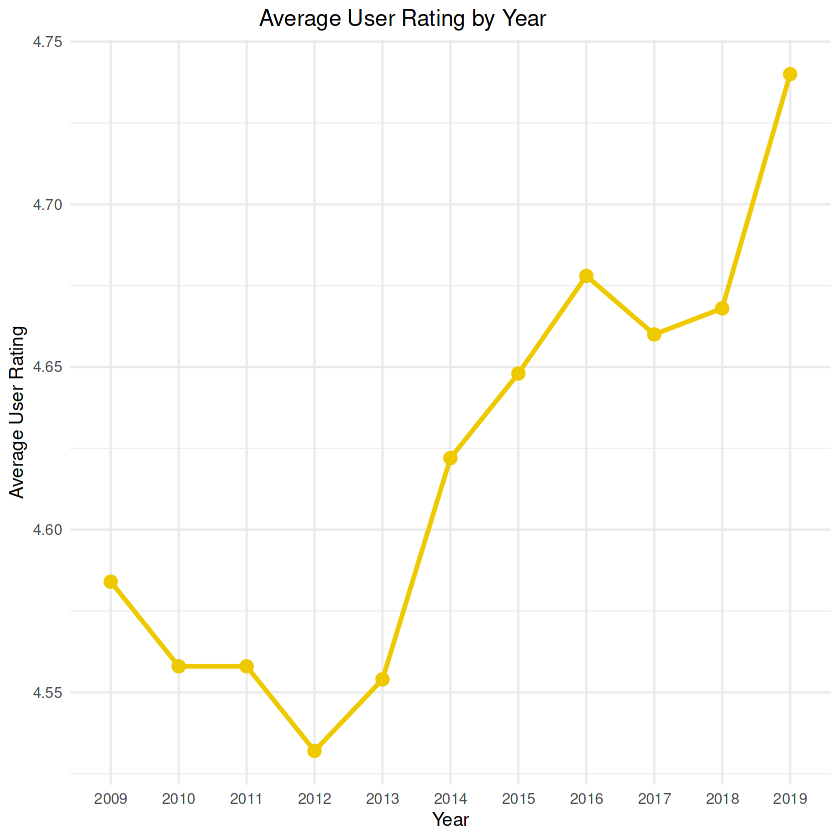

Saving 12.5 x 6.67 in image


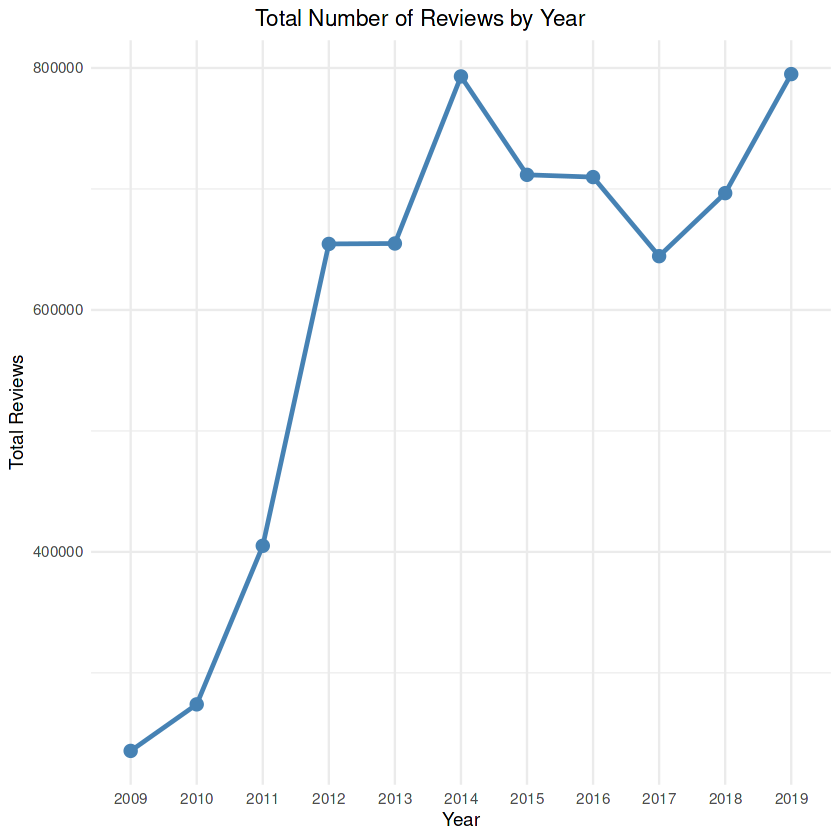

Saving 12.5 x 6.67 in image


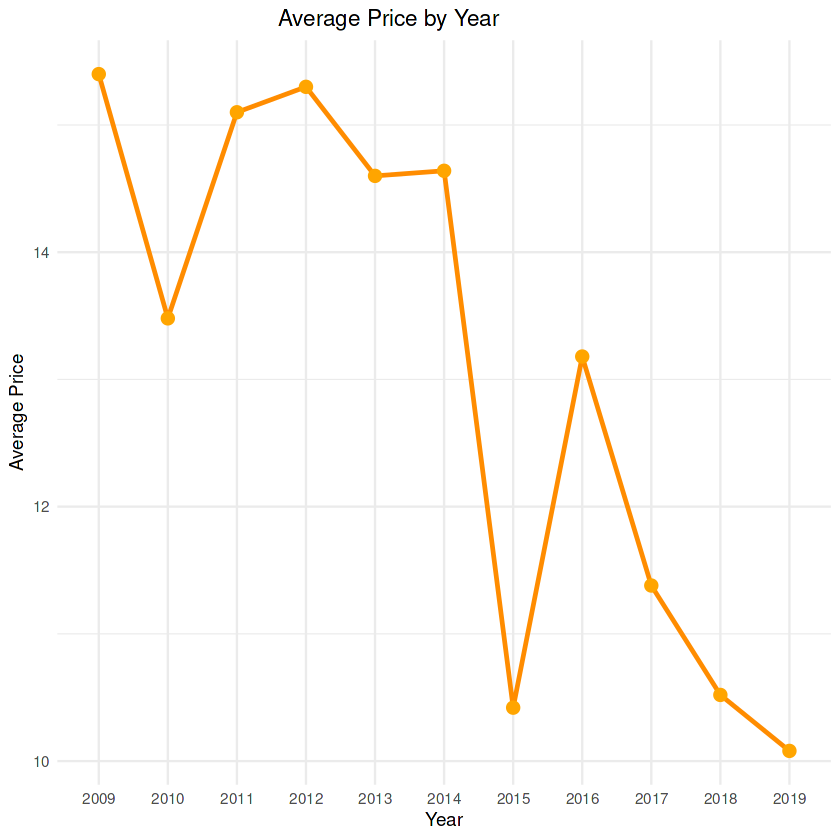

Saving 12.5 x 6.67 in image


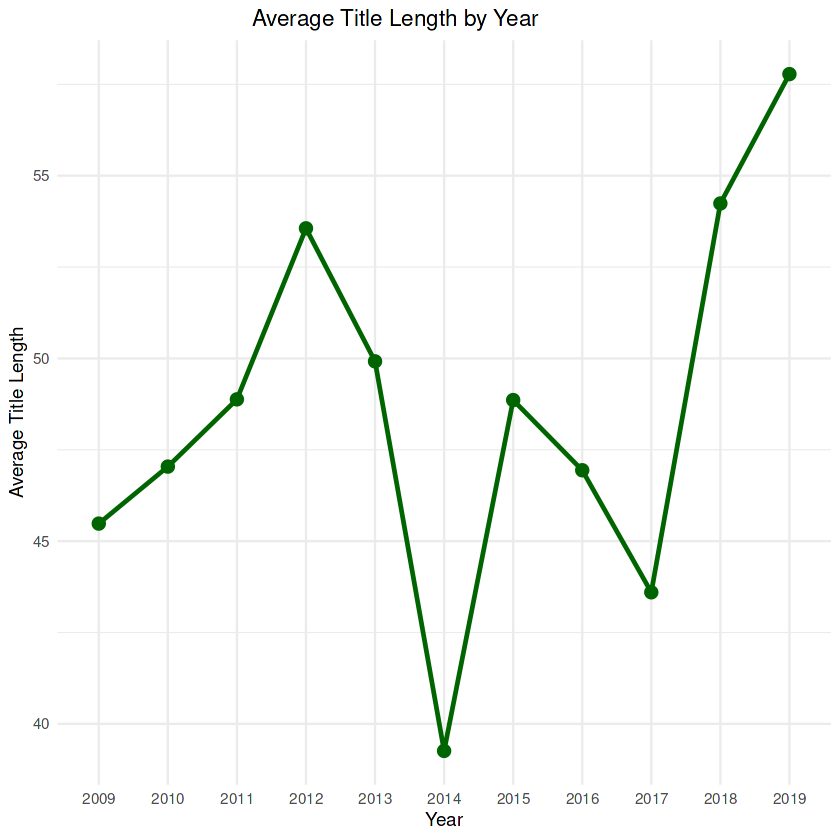

In [13]:
#Plotting the line charts
#Line chart for the average rating
options(scipen=999)
average_user_rating <- bestsellers %>%
  group_by(year) %>%
  summarize(average_rating = mean(user_rating))

ggplot(average_user_rating, aes(x = factor(year), y = average_rating)) +
  geom_line(aes(group = 1), color = "gold2", size = 1) +
  geom_point(color = "gold2", size = 3) +
  labs(title = "Average User Rating by Year",
       x = "Year",
       y = "Average User Rating") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_discrete(labels = seq(2009, 2019, by = 1))  
ggsave('Average User Rating by Year.png')

#Line chart for the total number of reviews
options(scipen=999)
total_reviews <- bestsellers %>%
  group_by(year) %>%
  summarize(total_reviews = sum(reviews))

ggplot(total_reviews, aes(x = factor(year), y = total_reviews)) +
  geom_line(aes(group = 1), color = "steelblue", size = 1) +
  geom_point(color = "steelblue", size = 3) +
  labs(title = "Total Number of Reviews by Year",
       x = "Year",
       y = "Total Reviews") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_discrete(labels = seq(2009, 2019, by = 1))
ggsave('Total Number of Reviews by Year.png')

#Line chart for the average price
average_price <- bestsellers %>%
  group_by(year) %>%
  summarize(average_price = mean(price))

ggplot(average_price, aes(x = factor(year), y = average_price)) +
  geom_line(aes(group = 1), color = "darkorange", size = 1) +
  geom_point(color = "orange", size = 3) +
  labs(title = "Average Price by Year",
       x = "Year",
       y = "Average Price") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_discrete(labels = seq(2009, 2019, by = 1))
ggsave('Average Price by Year.png')

#Line chart for the average title length
average_title_length <- bestsellers %>%
  group_by(year) %>%
  summarize(average_title_length = mean(title_length))

ggplot(average_title_length, aes(x = factor(year), y = average_title_length)) +
  geom_line(aes(group = 1), color = "darkgreen", size = 1) +
  geom_point(color = "darkgreen", size = 3) +
  labs(title = "Average Title Length by Year",
       x = "Year",
       y = "Average Title Length") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_discrete(labels = seq(2009, 2019, by = 1))
ggsave('Average Title Length by Year.png')

- We can see a slight increase in ratings and number of reviews over time. The latter is expected, as the internet availabity increased globally since 2012.
- We can also notice a slight tendecy for the book prices to decrease over time. This may be due to increased competition among authors, since the availability of the internet worldwide has caused the appearance of many more authors and books in recent years, anyone being able to publish their books online. This increased competition forces authors to reduce their book prices to an optimal price that allows people to buy them. This also suggests that price and marketing strategies have also changed, since lower prices also allow for more popularity among readers. 
- The title length of the books don't show a stong tendency to have changed; however, we can still see that in the last two years (2018 and 2019), the title length has slightly increased. This suggests that authors might be opting for longer titles in recent years because they might need them to better capture the essence of the book and attract more readers.

### Author Analysis
Now we want to analyze the book authors. We'll start by understanding how many (distinct) authors have written books that were part of the 50 Amazon Bestsellers in their corresponding year, in this time period (from 2009 through 2019); we know there are 550 books in total, but the number of authors is less than that because many authors have written more than just one bestseller in this time frame.

Next, we'll want to know how many distinct authors have written bestsellers per year. We can both make a table and a line chart to visualize the changes better.

  number_of_authors
1               248
# A tibble: 11 × 2
   year  number_of_authors
   <fct>             <int>
 1 2009                 39
 2 2010                 43
 3 2011                 45
 4 2012                 42
 5 2013                 47
 6 2014                 44
 7 2015                 44
 8 2016                 47
 9 2017                 49
10 2018                 46
11 2019                 47


Saving 12.5 x 6.67 in image


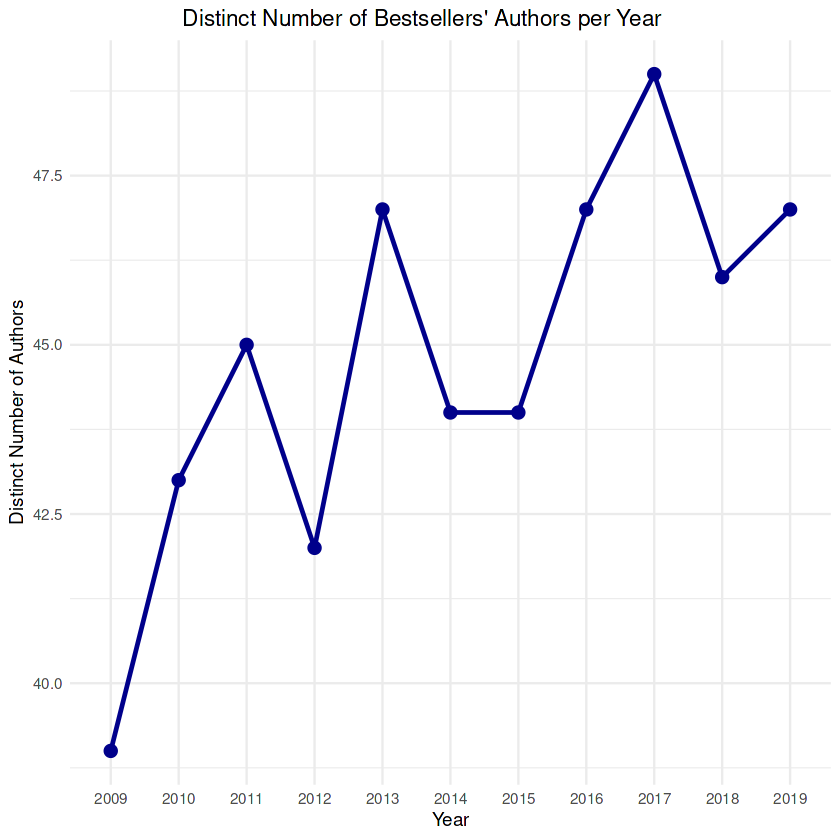

In [14]:
#Author Analysis
#Number of total authors
distinct_author_count <- bestsellers %>%
  summarize(number_of_authors = n_distinct(author))
print(distinct_author_count)

#Number of distinct authors per year
distinct_authors_per_year <- bestsellers %>%
  group_by(year) %>%
  summarize(number_of_authors = n_distinct(author))
print(distinct_authors_per_year)

#Line chart for the number of distinct authors per year
ggplot(distinct_authors_per_year, aes(x = factor(year), y = number_of_authors)) +
  geom_line(aes(group = 1), color = "darkblue", size = 1) +
  geom_point(color = "darkblue", size = 3) +
  labs(title = "Distinct Number of Bestsellers' Authors per Year",
       x = "Year",
       y = "Distinct Number of Authors") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_discrete(labels = seq(2009, 2019, by = 1))
ggsave("Distinct Number of Bestsellers' Authors per Year.png")

- There are 248 distinct authors for the 550 Amazon best-selling books from 2009 to 2019.
- There isn't a significant difference among the number of distinct authors by year. However, from 2009 to 2012 there were slightly fewer authors, meaning that before there were more popular and successful authors that wrote more than 1 bestseller in that same year. On the other hand, in recent years there were very few authors that actually managed to write more than one bestseller in the same year; in 2017, there was only 1 author that managed to write two bestsellers.
- This reinforces our idea that in more recent years, there are many more successful authors and the competition on Amazon bestsellers is fiercer now since authors don't manage or are struggling a lot to write more than one bestseller in the same year.

Now we want to undertand how many (distinct) authors have written 1 book, 2 books, 3 books up until 12 books that were part of the 50 Amazon Bestsellers in their corresponding year, in this time period (from 2009 through 2019). We can get a summarized table and even graph a scatter plot to see any relationship between the total number of books written during this time frame and the number of distinct authors.

# A tibble: 9 × 3
  total_books number_of_authors percentage_of_authors
        <int>             <int>                 <dbl>
1           1               202                81.5  
2           2                27                10.9  
3           3                 7                 2.82 
4           4                 3                 1.21 
5           5                 3                 1.21 
6           6                 3                 1.21 
7           7                 1                 0.403
8          10                 1                 0.403
9          12                 1                 0.403
Authors who wrote 7, 10, and 12 Amazon bestsellers respectively:
[1] "Jeff Kinney"     "Rick Riordan"    "Stephenie Meyer"


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 12.5 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


Correlation Coefficient: -0.5342138

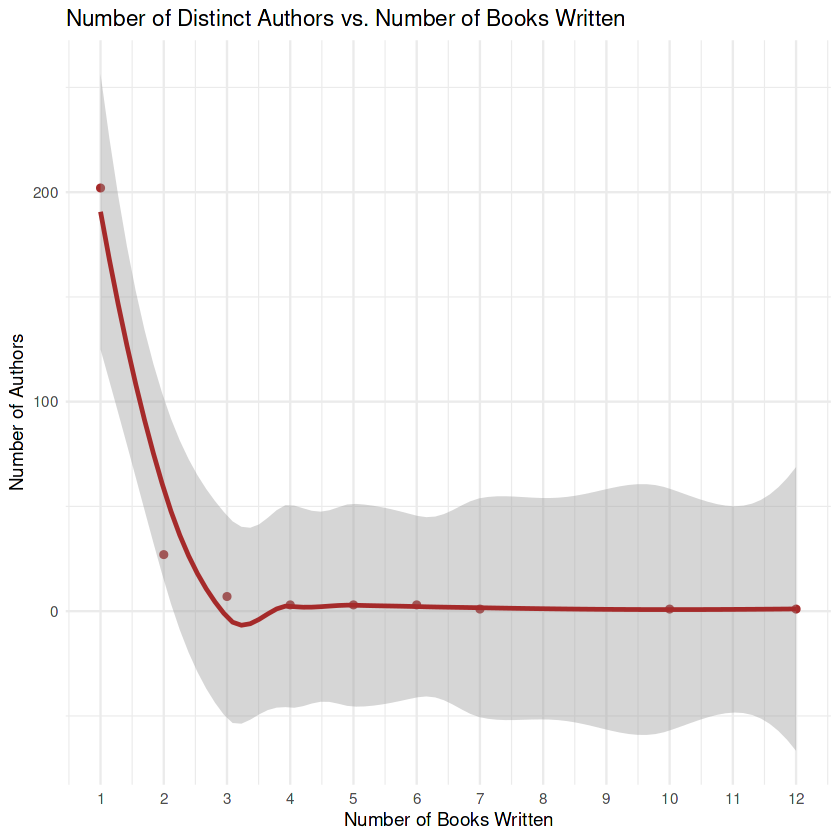

In [15]:
#Number of distinct authors by number of bestsellers written
author_book_count <- bestsellers %>%
  group_by(author) %>%
  summarize(total_books = n_distinct(name))
author_count_by_books <- author_book_count %>%
  group_by(total_books) %>%
  summarize(number_of_authors = n()) %>%
  filter(total_books >= 1 & total_books <= 20)
author_count_by_books <- author_count_by_books %>%
  mutate(percentage_of_authors = (number_of_authors / sum(number_of_authors)) * 100)
print(author_count_by_books)

#The 3 authors that managed to write 7, 10 and 12 Amazon bestsellers respectively
selected_authors <- author_book_count %>%
  filter(total_books %in% c(7, 10, 12))
cat("Authors who wrote 7, 10, and 12 Amazon bestsellers respectively:\n")
print(selected_authors$author)

#Scatter plot for the number of distinct authors vs the number of books
ggplot(author_count_by_books, aes(x = total_books, y = number_of_authors)) +
  geom_point(color = "brown") +
  geom_smooth(color = "brown") +
  labs(title = "Number of Distinct Authors vs. Number of Books Written",
       x = "Number of Books Written",
       y = "Number of Authors") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(1, 13, by = 1), labels = seq(1, 13, by = 1))
ggsave("Number of Distinct Authors vs. Number of Books Written.png")

correlation_coefficient <- cor(author_count_by_books$total_books, author_count_by_books$number_of_authors)
cat("Correlation Coefficient:", correlation_coefficient)

- As expected, the great majority of authors (81.5%) have written only one Amazon best-selling book throughout this period of 11 years (2009 through 2019). However, we can see that 10.9% of the authors managed to write 2 Amazon best-selling books, while the number of bestsellers above this written by a single author drops substantially.
- There are 3 noticeable authors that managed to write 7, 10 and 12 Amazon bestsellers respectively throughout these 11 years. These authors are  Stephenie Meyer, Rick Riordan and Jeff Kinney respectively.
- Generally we can see that it's very hard for authors to get more than one Amazon bestseller throughout many years and only few (18.5) managed to do it. Likewise, it's even harder that authors get more than two Amazon bestsellers throughout many years, since only very few (7.6%) managed to do it.
- As expected, there's a general negative correlation between the number of distinct authors and the number of Amazon bestsellers written throuhout this period, but this relationships stabilizes from 4 bestsellers and above. We can also see this based on the correlation coefficient of -0.53, which indicates a moderate negative correlation.

### Authors per Year
We saw that there are some authors that managed to write many bestsellers throughout the years 2009 and 2019, we want to analyze these authors to see the tendencies of when they published their Amazon best-selling books.

In [16]:
#Authors per Year
#Noticeable authors
selected_years <- bestsellers %>%
  filter(author %in% c("Stephenie Meyer", "Rick Riordan", "Jeff Kinney")) %>%
  group_by(author) %>% 
  arrange(author, year)

print(as.data.frame(selected_years %>% select(author, year)))

#Authors with 3 bestsellers
authors_with_3_bestsellers <- bestsellers %>%
  group_by(author) %>%
  summarise(total_bestsellers = n_distinct(name), total_books = sum(book_count)) %>%
  filter(total_bestsellers == 3, total_books == 3) %>%
  pull(author)
print(authors_with_3_bestsellers)

#Years these authors published bestsellers
selected_authors <- bestsellers %>%
  filter(author %in% c("Dan Brown", "Glenn Beck", "Ina Garten", "Ree Drummond")) %>%
  group_by(author) %>% 
  arrange(author, year)
print(as.data.frame(selected_authors %>% select(author, year)))

            author year
1      Jeff Kinney 2009
2      Jeff Kinney 2009
3      Jeff Kinney 2010
4      Jeff Kinney 2011
5      Jeff Kinney 2012
6      Jeff Kinney 2013
7      Jeff Kinney 2014
8      Jeff Kinney 2015
9      Jeff Kinney 2016
10     Jeff Kinney 2017
11     Jeff Kinney 2018
12     Jeff Kinney 2019
13    Rick Riordan 2009
14    Rick Riordan 2010
15    Rick Riordan 2010
16    Rick Riordan 2010
17    Rick Riordan 2010
18    Rick Riordan 2011
19    Rick Riordan 2011
20    Rick Riordan 2012
21    Rick Riordan 2012
22    Rick Riordan 2013
23    Rick Riordan 2014
24 Stephenie Meyer 2009
25 Stephenie Meyer 2009
26 Stephenie Meyer 2009
27 Stephenie Meyer 2009
28 Stephenie Meyer 2009
29 Stephenie Meyer 2009
30 Stephenie Meyer 2010
[1] "Dan Brown"    "Glenn Beck"   "Ina Garten"   "Ree Drummond"
         author year
1     Dan Brown 2009
2     Dan Brown 2013
3     Dan Brown 2017
4    Glenn Beck 2009
5    Glenn Beck 2009
6    Glenn Beck 2010
7    Ina Garten 2010
8    Ina Garten 2012
9  

- We can see that Jeff Kinney is the only author who managed to publish an Amazon bestseller every year throughout 11 years.
- Rick Riordan only managed to have bestsellers from 2009 through 2014, and Stephenie Meyer only in 2009 and 2010.
- Although this data could reinforce the fact the it's harder to get a bestseller nowadays, we have to take into account that these authors are best known mainly for one book series and that's the main reason why they got those bestsellers in those years, so we'll need to analyze other authors.
- We analyzed the authors that had 3 bestsellers throughout this period. These authors are Dan Brown, Glenn Beck, Ina Garten and Ree Drummond and discovered that most of these authors also published Amazon bestsellers in the first years of the period, meaning that it's certainly much harder to have more bestsellers in recent years.

### Genre Analysis
Now let's figure out which kind of books are most popular, fiction or non-fiction books. We'll first plot a pie chart for the general distribution of these two genres throughout the entire period of analysis. 

We can also make a summarized table of the number of books by year and genre to see if there were any changes in the distribution of fiction and non-fiction bestsellers according to year. We can plot two line charts for each type of genre and see yearly changes.

Saving 12.5 x 6.67 in image
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


# A tibble: 22 × 3
# Groups:   year [11]
   year  genre       count
   <fct> <fct>       <int>
 1 2009  Fiction        24
 2 2009  Non Fiction    26
 3 2010  Fiction        20
 4 2010  Non Fiction    30
 5 2011  Fiction        21
 6 2011  Non Fiction    29
 7 2012  Fiction        21
 8 2012  Non Fiction    29
 9 2013  Fiction        24
10 2013  Non Fiction    26
11 2014  Fiction        29
12 2014  Non Fiction    21
13 2015  Fiction        17
14 2015  Non Fiction    33
15 2016  Fiction        19
16 2016  Non Fiction    31
17 2017  Fiction        24
18 2017  Non Fiction    26
19 2018  Fiction        21
20 2018  Non Fiction    29
21 2019  Fiction        20
22 2019  Non Fiction    30


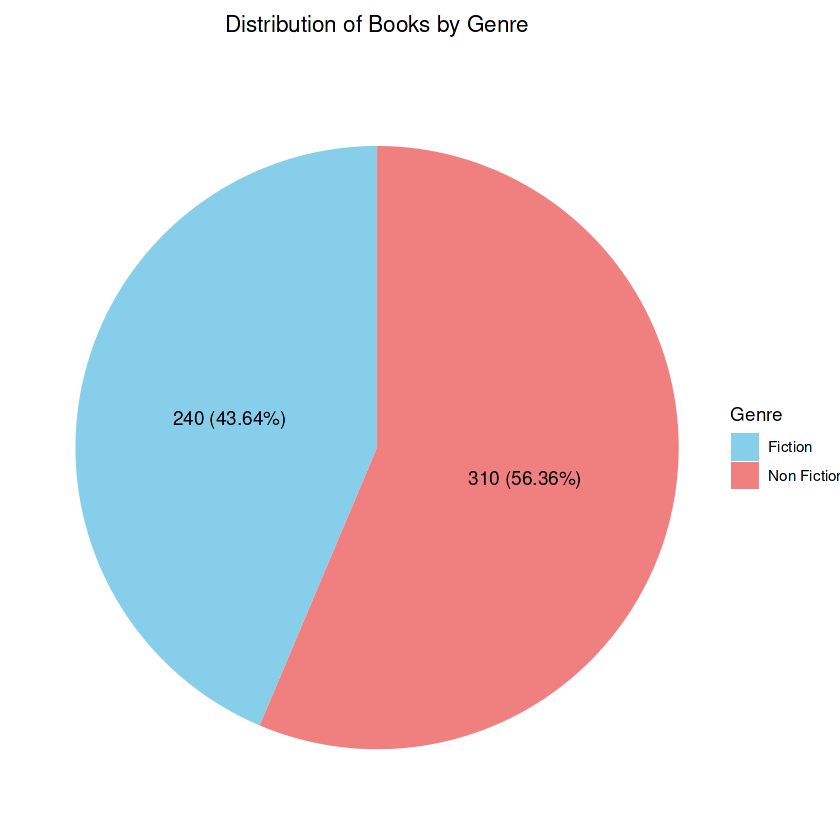

Saving 12.5 x 6.67 in image


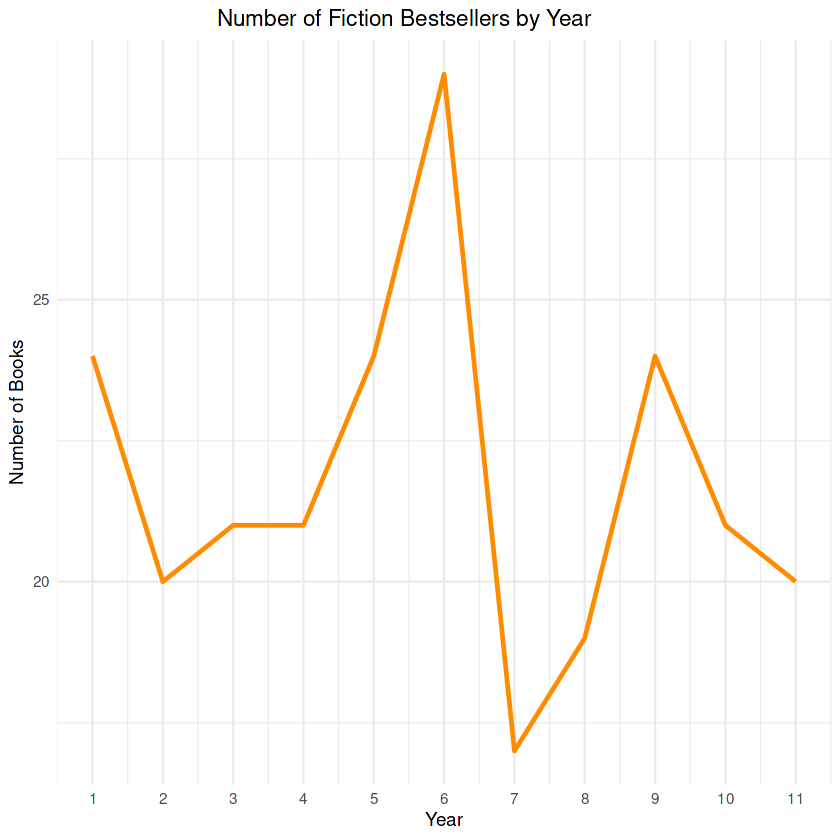

Saving 12.5 x 6.67 in image


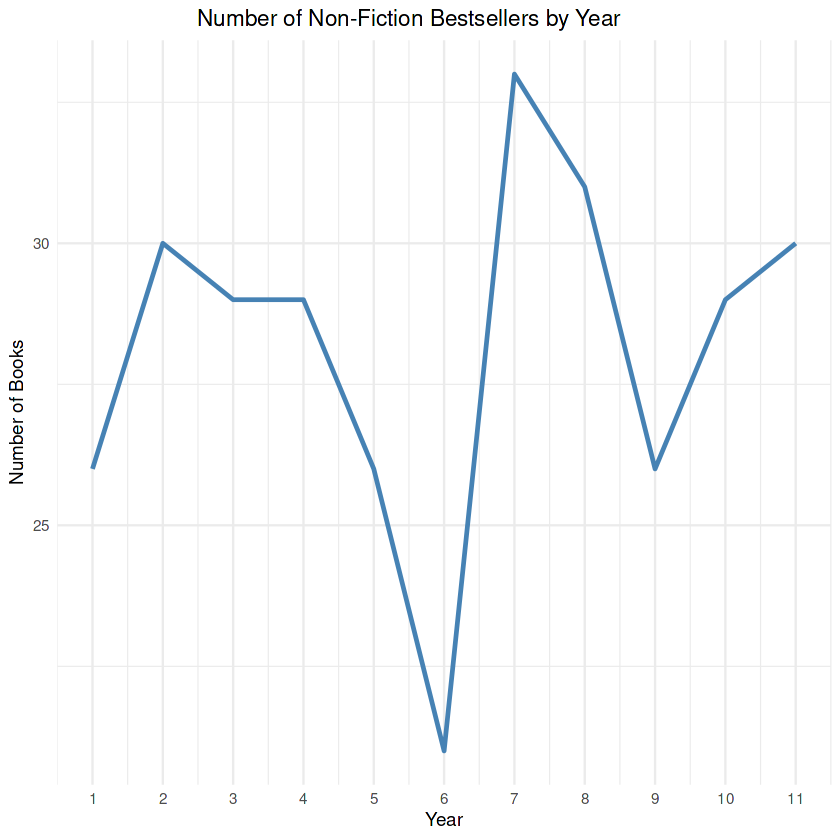

In [17]:
#Genre Analysis
#Pie chart
filtered_bestsellers <- bestsellers %>%
  filter(genre %in% c('Fiction', 'Non Fiction'))

genre_counts <- filtered_bestsellers %>%
  group_by(genre) %>%
  summarise(count = n())

ggplot(genre_counts, aes(x = "", y = count, fill = genre)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Books by Genre",
       fill = "Genre") +
  scale_fill_manual(values = c("Fiction" = "skyblue", "Non Fiction" = "lightcoral")) +
  geom_text(aes(label = paste0(count, " (", scales::percent(count / sum(count), accuracy = 0.01), ")")),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))
ggsave("Distribution of Books by Genre.png")

#Number of books by year and genre
years <- unique(bestsellers$year)
genres <- c('Fiction', 'Non Fiction')
combinations <- expand.grid(year = years, genre = genres)

summary_table <- left_join(combinations, bestsellers, by = c('year', 'genre')) %>%
  group_by(year, genre) %>%
  summarise(count = n())
print(summary_table, n = nrow(summary_table))

#Number of Fiction Bestsellers by Year
fiction_bestsellers <- bestsellers %>%
  filter(genre == "Fiction")

fiction_counts_by_year <- fiction_bestsellers %>%
  group_by(year) %>%
  summarise(number_of_books = n())

ggplot(fiction_counts_by_year, aes(x = as.integer(year), y = number_of_books)) +
  geom_line(color = "darkorange", size = 1) +
  labs(title = "Number of Fiction Bestsellers by Year",
       x = "Year",
       y = "Number of Books") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_continuous(breaks = seq(min(as.integer(fiction_counts_by_year$year)), max(as.integer(fiction_counts_by_year$year)), by = 1))
ggsave("Number of Fiction Bestsellers by Year.png")

#Number of Non-Fiction Bestsellers by Year
non_fiction_bestsellers <- bestsellers %>%
  filter(genre == "Non Fiction")
non_fiction_counts_by_year <- non_fiction_bestsellers %>%
  group_by(year) %>%
  summarise(number_of_books = n())
ggplot(non_fiction_counts_by_year, aes(x = as.integer(year), y = number_of_books)) +
  geom_line(color = "steelblue", size = 1) +
  labs(title = "Number of Non-Fiction Bestsellers by Year",
       x = "Year",
       y = "Number of Books") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_continuous(breaks = seq(min(as.integer(non_fiction_counts_by_year$year)), max(as.integer(non_fiction_counts_by_year$year)), by = 1))
ggsave("Number of Non-Fiction Bestsellers by Year.png")

- Most Amazon bestsellers (56.36%) are non-fiction books, meaning Amazon readers prefer more realistic plots and storylines which reflect real life.
- As expected, most years follow the pattern of more non-fiction bestsellers than fiction bestsellers. However, in 2014 there were more fiction best-selling books on Amazon.
- Non-fiction best-selling books were the highest in 2015 and 2016.

Now we want to know the average relevant measures for the genre categories. First we'll get a summary table by genre to get an general but insightful overview of relevant indicators of the books by genre and then the sae summary table by genre and by year.

In [18]:
#Summary table by genre
summary_genre <- bestsellers %>%
  group_by(genre) %>%
  summarize(
    avg_user_rating = mean(user_rating, na.rm = TRUE),
    avg_num_reviews = mean(reviews, na.rm = TRUE),
    avg_price = mean(price, na.rm = TRUE),
    avg_title_length = mean(title_length, na.rm = TRUE),
    num_distinct_authors = n_distinct(author),
    percentage_distinct_authors = (num_distinct_authors / n()) * 100
  )
print(summary_genre)

#Summary table by year and genre
summary_yeargenre <- bestsellers %>%
  group_by(year, genre) %>%
  summarise(
    average_user_rating = mean(user_rating),
    average_reviews = mean(reviews),
    average_price = mean(price),
    average_title_length = mean(title_length),
    total_books = n(),
    total_distinct_authors = n_distinct(author),
      )
print(summary_yeargenre, n = Inf)

# A tibble: 2 × 7
  genre       avg_user_rating avg_num_reviews avg_price avg_title_length
  <fct>                 <dbl>           <dbl>     <dbl>            <dbl>
1 Fiction                4.65          15684.      10.8             35.2
2 Non Fiction            4.60           9065.      14.8             59.1
# ℹ 2 more variables: num_distinct_authors <int>,
#   percentage_distinct_authors <dbl>


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


# A tibble: 22 × 8
# Groups:   year [11]
   year  genre       average_user_rating average_reviews average_price
   <fct> <fct>                     <dbl>           <dbl>         <dbl>
 1 2009  Fiction                    4.59           6534.         15.6 
 2 2009  Non Fiction                4.58           3026.         15.2 
 3 2010  Fiction                    4.62           8409.          9.7 
 4 2010  Non Fiction                4.52           3527.         16   
 5 2011  Fiction                    4.62          10335.         11.6 
 6 2011  Non Fiction                4.51           6483.         17.6 
 7 2012  Fiction                    4.50          19896.         12.3 
 8 2012  Non Fiction                4.56           8163.         17.5 
 9 2013  Fiction                    4.55          19987.         10.7 
10 2013  Non Fiction                4.56           6739.         18.2 
11 2014  Fiction                    4.63          19383.         10.2 
12 2014  Non Fiction                

- Amazon readers prefer fiction books, as they rate it higher and review them more.
- Fiction books also tend to cost less than non-fiction books by 4 dollars, which might influence readers and be one of the main reasons why fiction books are more popular and preferred.
- We can also see that fiction books generally have much shorter titles, which could also influence the attractivess of books and another reason why readers prefer these kinds of books.
- Fiction books also have a lower percentage of distinct authors, meaning the out of all fiction books, only 37.9% are written by different authors, compared to 51.3% for non-fiction books. This suggests that fiction books tend to have more sequel books of the same plot and that there are a fewer quantity of best-selling fiction authors compared to best-selling non-fiction authors.
- The difference between user ratings for fiction and non-fiction books is more prominent in the last years from 2017 through 2019, whereas the most prominent difference between the number of reviews between these genres was present in 2015. This suggests that in more recent years, there's a preferance for fiction books.
- There was a noticeable difference in price between the two genre categories from 2010 through 2014, meaning that there was a big price tendency in these years depending on the book genre.
- There was more variation between the number of fiction and nonfiction books in 2015 and 2016, with nonfiction books having more bestsellers.

We can also plot the relevant measures for fiction and nonfiction books over time in the same plot to see differences more clearly.

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
Saving 12.5 x 6.67 in image
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


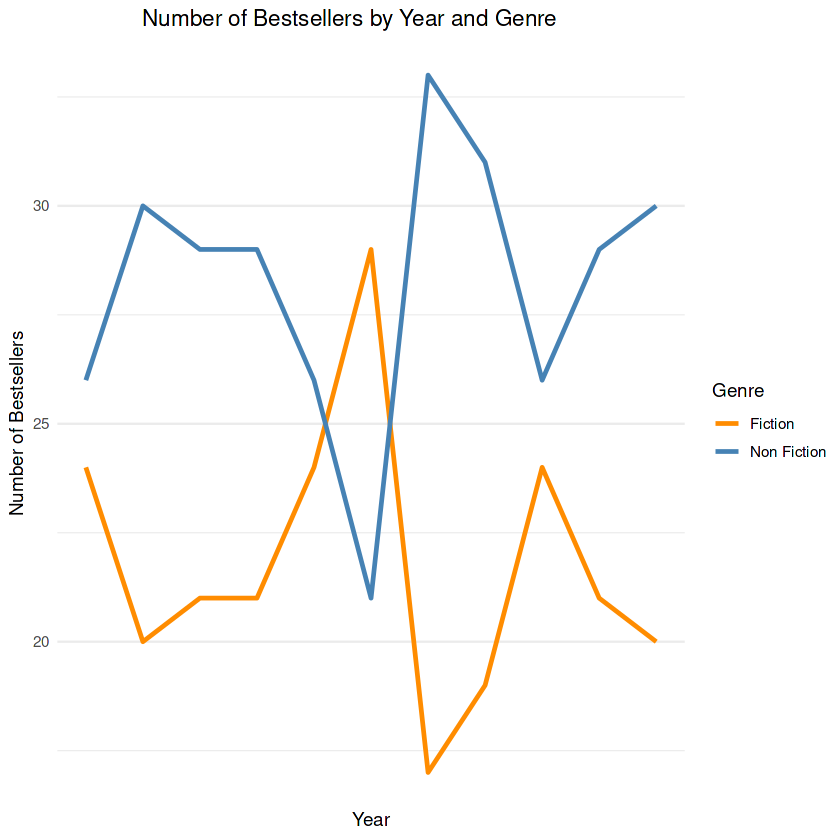

Saving 12.5 x 6.67 in image
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


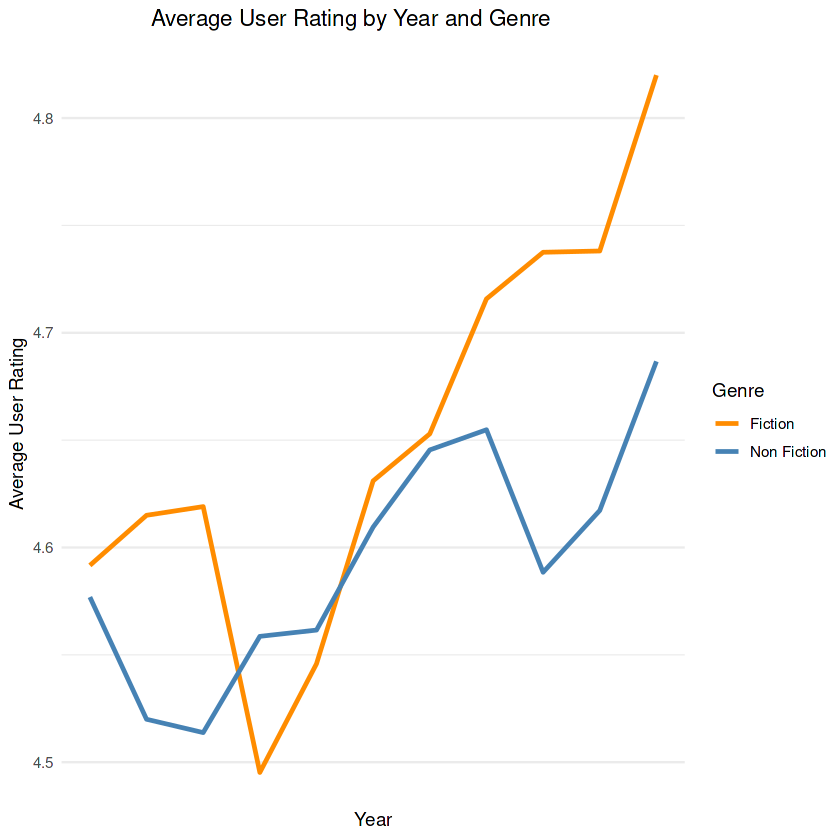

Saving 12.5 x 6.67 in image
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


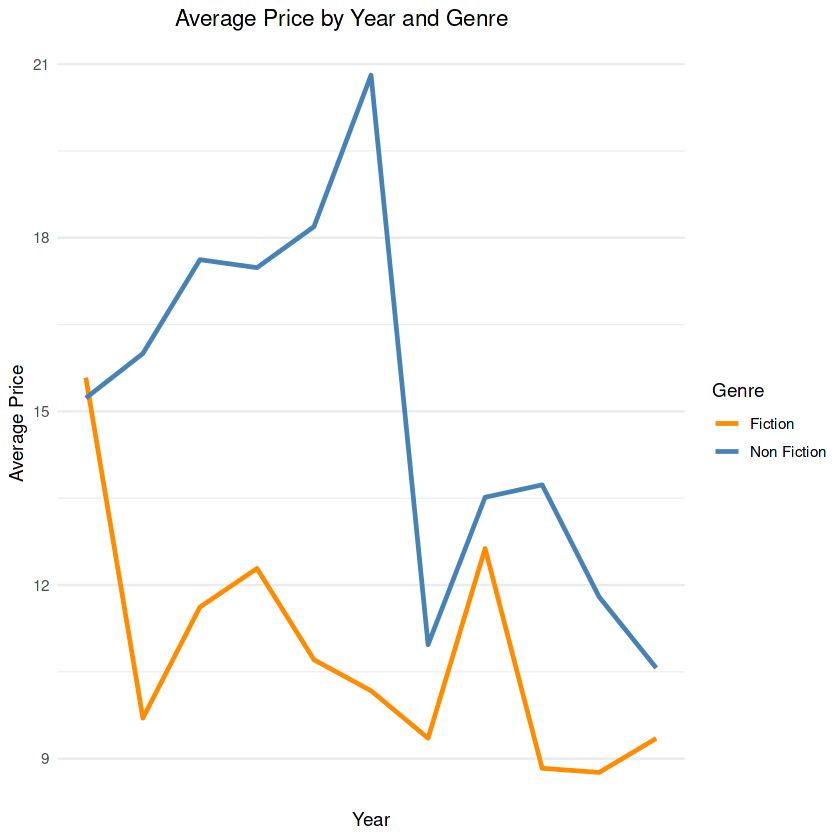

Saving 12.5 x 6.67 in image
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


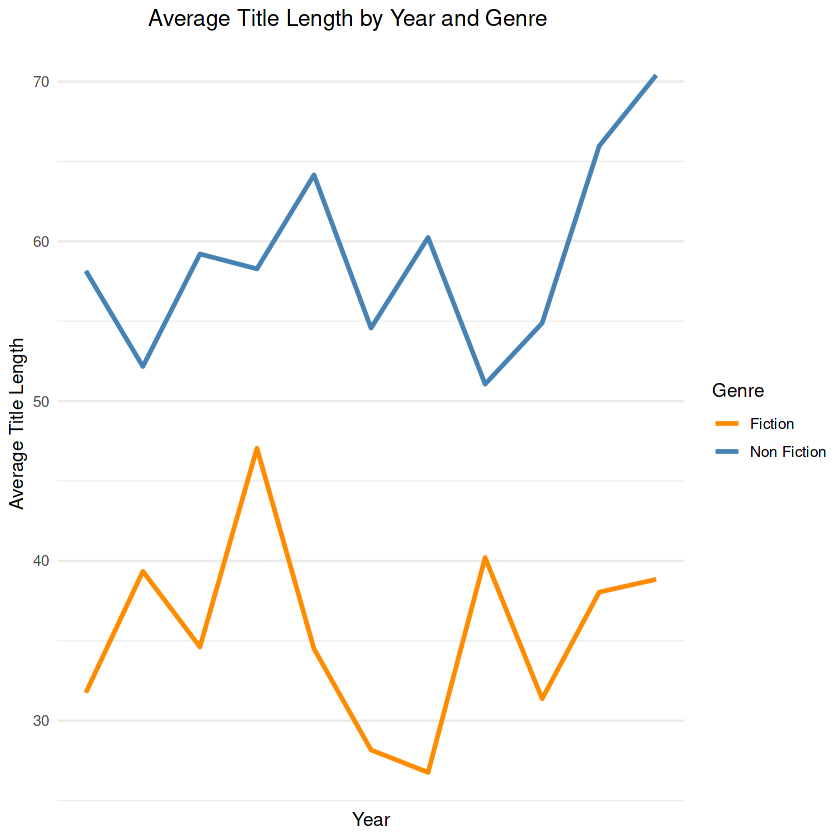

Saving 12.5 x 6.67 in image


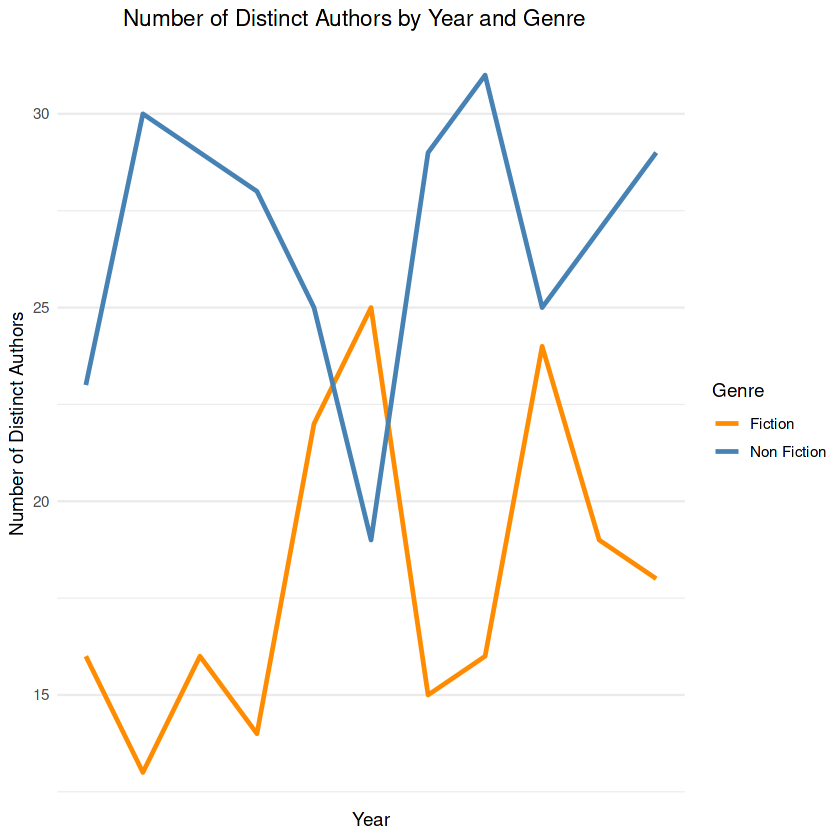

In [19]:
#Number of Bestsellers by Year and Genre
count_bestsellers_by_year_genre <- bestsellers %>%
  group_by(year, genre) %>%
  summarise(number_of_bestsellers = sum(book_count))

ggplot(count_bestsellers_by_year_genre, aes(x = as.integer(year), y = number_of_bestsellers, color = genre)) +
  geom_line(size = 1) +
  labs(title = "Number of Bestsellers by Year and Genre",
       x = "Year",
       y = "Number of Bestsellers",
       color = "Genre") +
  scale_color_manual(values = c("Fiction" = "darkorange", "Non Fiction" = "steelblue")) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_continuous(breaks = seq(2009, 2019, by = 1))
ggsave("Number of Bestsellers by Year and Genre.png")

#Average User Rating by Year and Genre
avg_user_rating_by_year_genre <- bestsellers %>%
  group_by(year, genre) %>%
  summarise(average_user_rating = mean(user_rating))

ggplot(avg_user_rating_by_year_genre, aes(x = as.integer(year), y = average_user_rating, color = genre)) +
  geom_line(size = 1) +
  labs(title = "Average User Rating by Year and Genre",
       x = "Year",
       y = "Average User Rating",
       color = "Genre") +
  scale_color_manual(values = c("Fiction" = "darkorange", "Non Fiction" = "steelblue")) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_continuous(breaks = seq(2009, 2019, by = 1))
ggsave("Average User Rating by Year and Genre.png")

#Average Price by Year and Genre
avg_price_by_year_genre <- bestsellers %>%
  group_by(year, genre) %>%
  summarise(average_price = mean(price))

ggplot(avg_price_by_year_genre, aes(x = as.integer(year), y = average_price, color = genre)) +
  geom_line(size = 1) +
  labs(title = "Average Price by Year and Genre",
       x = "Year",
       y = "Average Price",
       color = "Genre") +
  scale_color_manual(values = c("Fiction" = "darkorange", "Non Fiction" = "steelblue")) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_continuous(breaks = seq(2009, 2019, by = 1))
ggsave("Average Price by Year and Genre.png")

#Average Title Length by Year and Genre
avg_title_length_by_year_genre <- bestsellers %>%
  group_by(year, genre) %>%
  summarise(average_title_length = mean(title_length))

ggplot(avg_title_length_by_year_genre, aes(x = as.integer(year), y = average_title_length, color = genre)) +
  geom_line(size = 1) +
  labs(title = "Average Title Length by Year and Genre",
       x = "Year",
       y = "Average Title Length",
       color = "Genre") +
  scale_color_manual(values = c("Fiction" = "darkorange", "Non Fiction" = "steelblue")) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_continuous(breaks = seq(2009, 2019, by = 1))
ggsave("Average Title Length by Year and Genre.png")

#Number of Distinct Authors by Year and Genre
distinct_authors_by_year_genre <- bestsellers %>%
  group_by(year, genre) %>%
  summarise(distinct_authors = n_distinct(author))

ggplot(distinct_authors_by_year_genre, aes(x = as.integer(year), y = distinct_authors, color = genre)) +
  geom_line(size = 1) +
  labs(title = "Number of Distinct Authors by Year and Genre",
       x = "Year",
       y = "Number of Distinct Authors",
       color = "Genre") +
  scale_color_manual(values = c("Fiction" = "darkorange", "Non Fiction" = "steelblue")) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4)) +
  scale_x_continuous(breaks = seq(2009, 2019, by = 1))
ggsave("Number of Distinct Authors by Year and Genre.png")

- First, we can see more clearly that the tendency was that most bestseller were nonfiction until 2014, which was the only year when there were more fiction bestsellers, and in the next year 2015, it was when there were the most nonfiction bestsellers on Amazon, being almost twice as nonfiction best-selling books as there were fiction best-selling books.
- We can see more clearly that the rating of fiction bestsellers had a sharp increase in recent years since 2014, with the year 2012 being the worst rated for these books. There was also an increase in ratings for nonfiction bestsellers over time, but in less pronounced way.
- We can see a slight sense of correlation that as the ratings of one genre increase over time, so does the ratings of the other genre. Even though this correlation is partial, it suggests that in more recent years, either readers are being more kind with their ratings and/or the bestsellers written are higher quality and more engaging.
- We can see that the prices of both genres generally change over time at a similar rate with the exception of 2014; when nonfiction prices were very high, while fiction prices were very low, and in 2015 and 2016; when both genres had a similar average price, 2015 and 2019 being the years with lowest prices. We can clearly see that in more recent years, prices for both genres have decreased, suggesting a preference for high-volume sales to profit rather than high prices, as they were before 2015 (from 2014 backwards).
- We can verify that nonfiction bestsellers usually have much longer titles than fiction bestsellers. There's a moderate negative correlation between the average title lengths of bestsellers by genre, meaning that when fiction bestsellers have longer titles, nonfiction bestsellers might have shorter titles.
- In general, nonfiction bestsellers have many more distinct authors because they have more best-selling books. As expected, the correlation is negative because the number of distinct authors changes the way just like the number of bestsellers.

### Category Analysis
Now we're going to analyze the different categories assigned for the ratings, number of reviews, price and title length.

Saving 12.5 x 6.67 in image


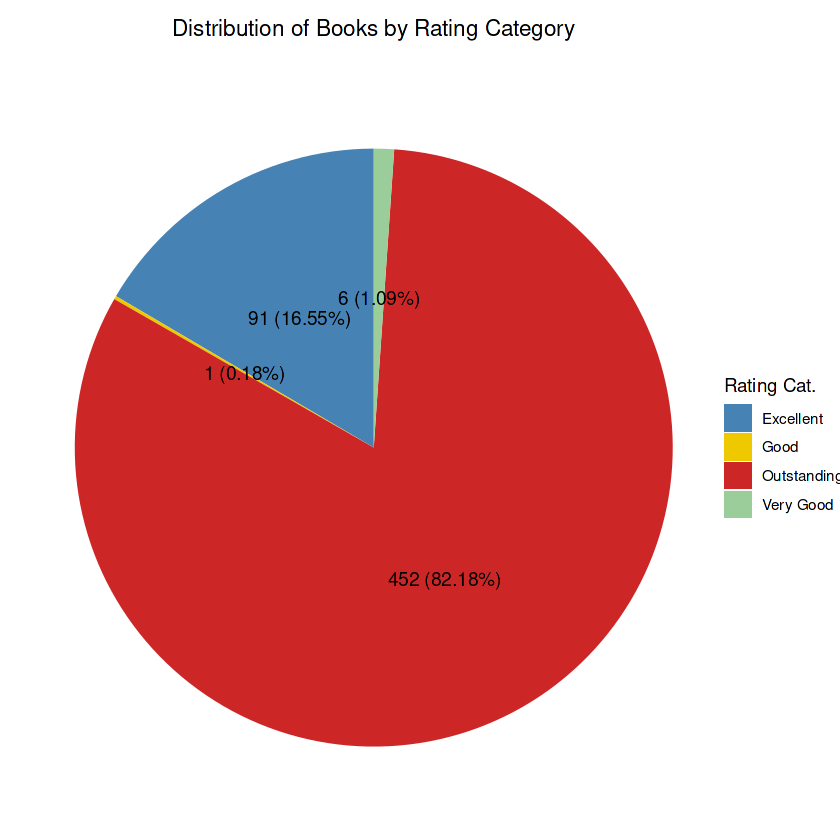

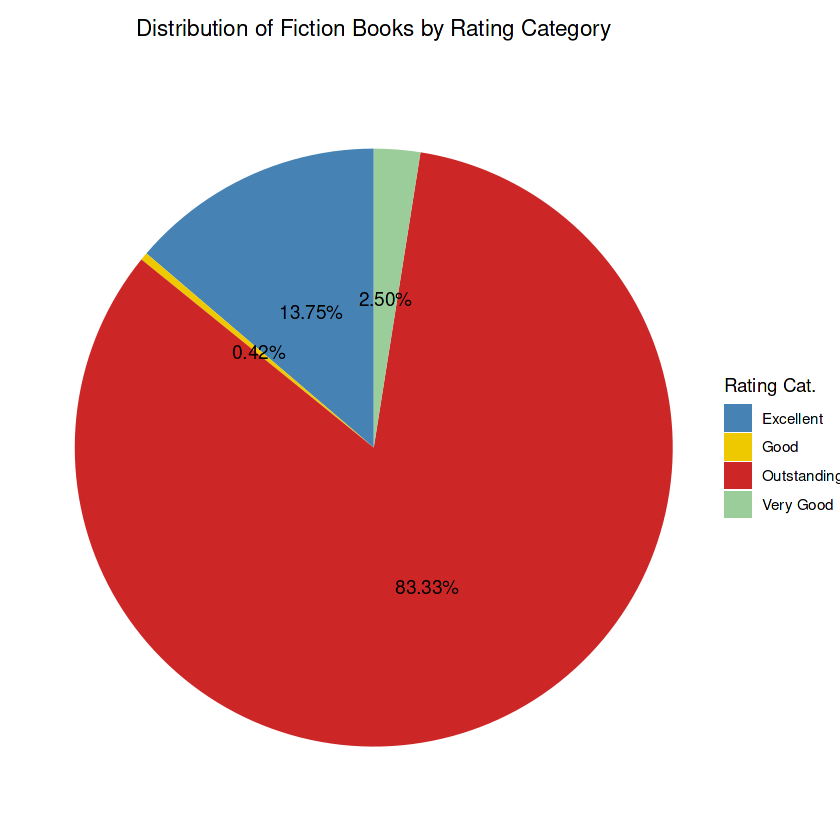

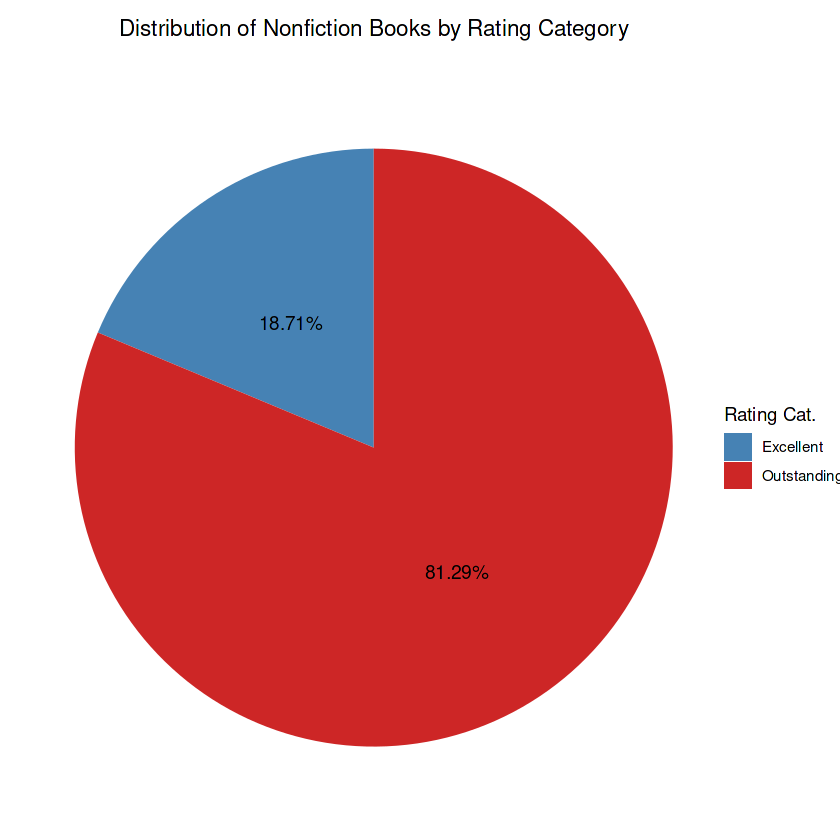

Saving 12.5 x 6.67 in image


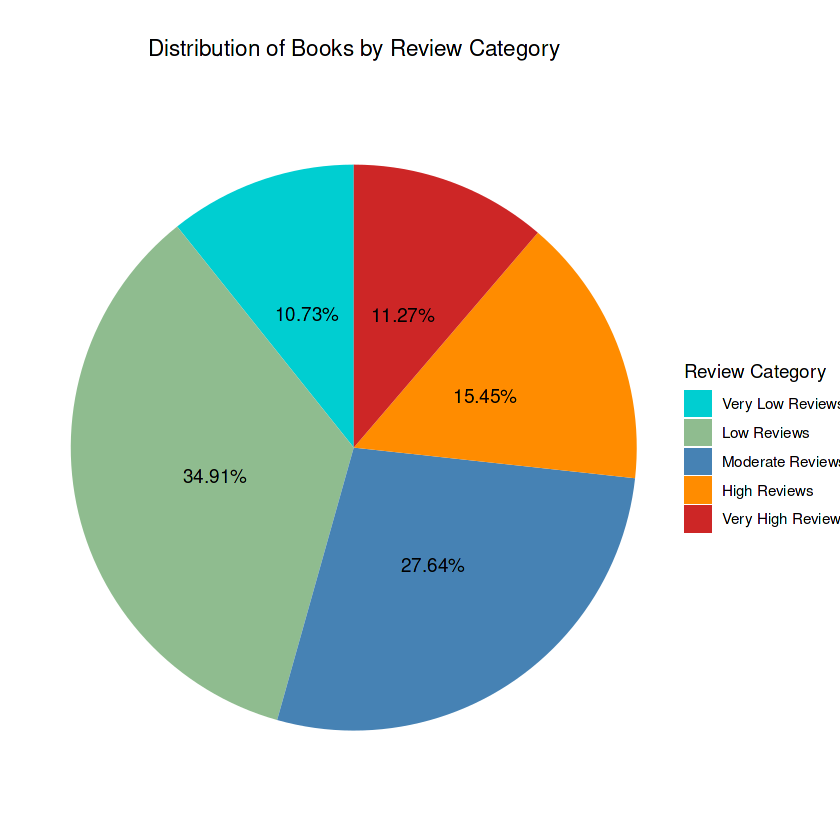

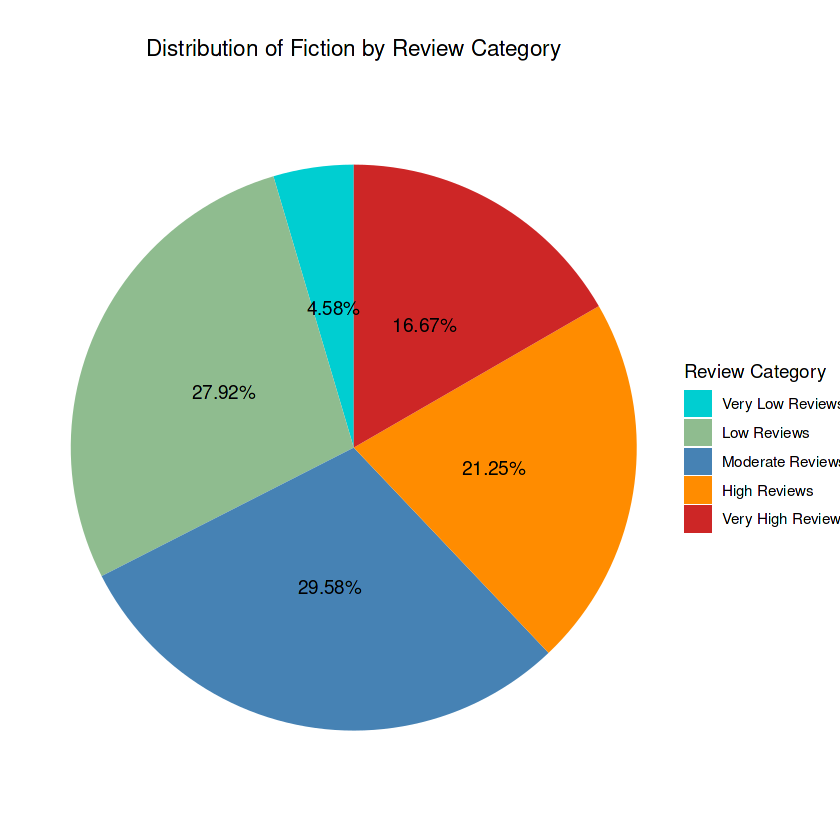

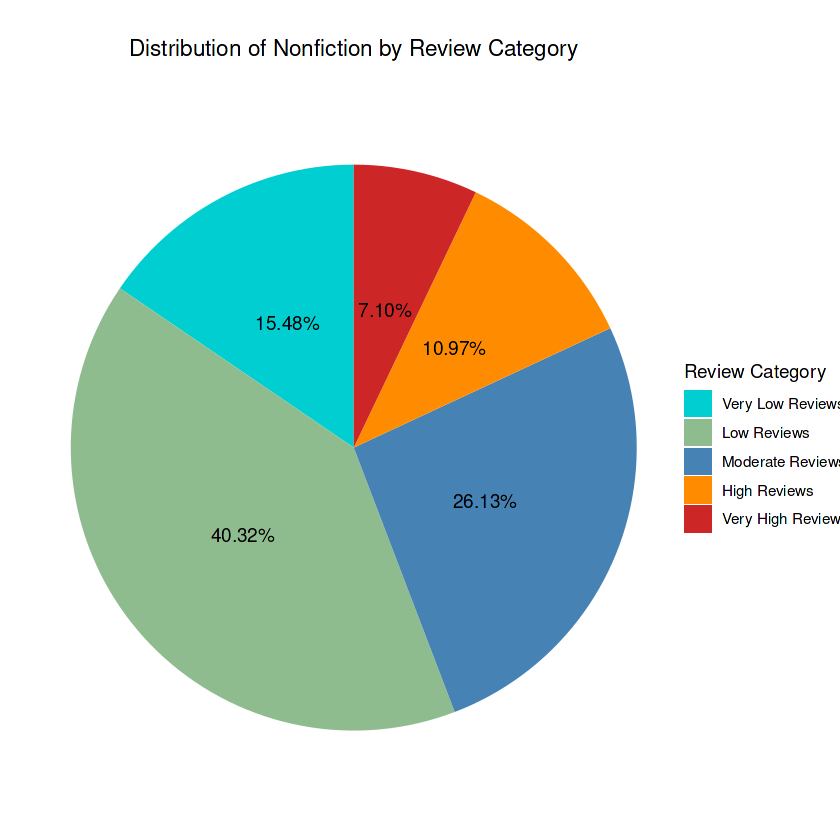

Saving 12.5 x 6.67 in image


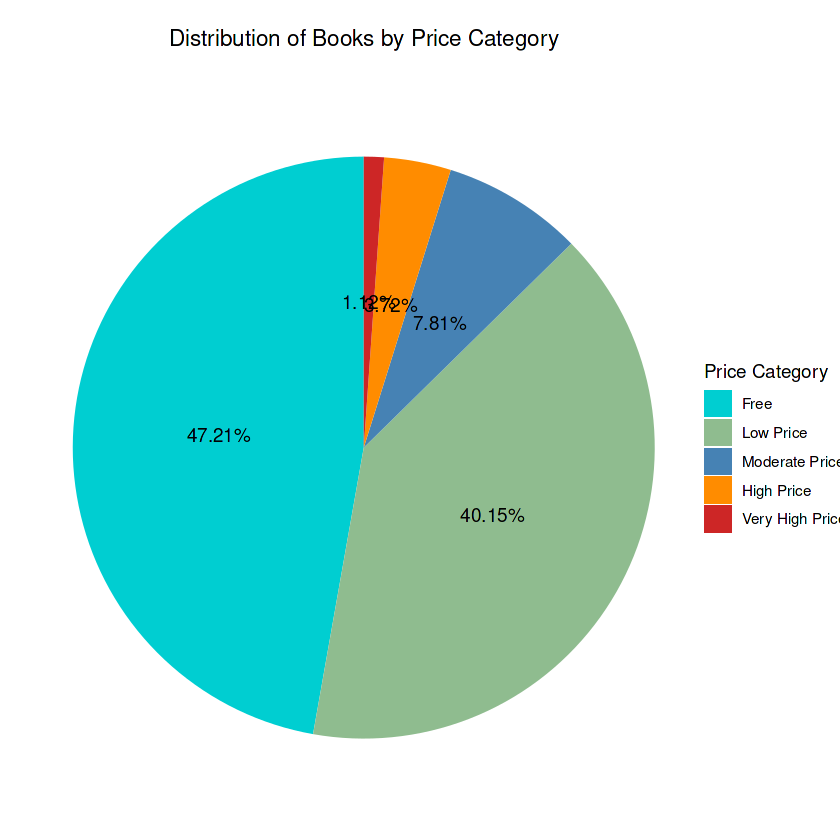

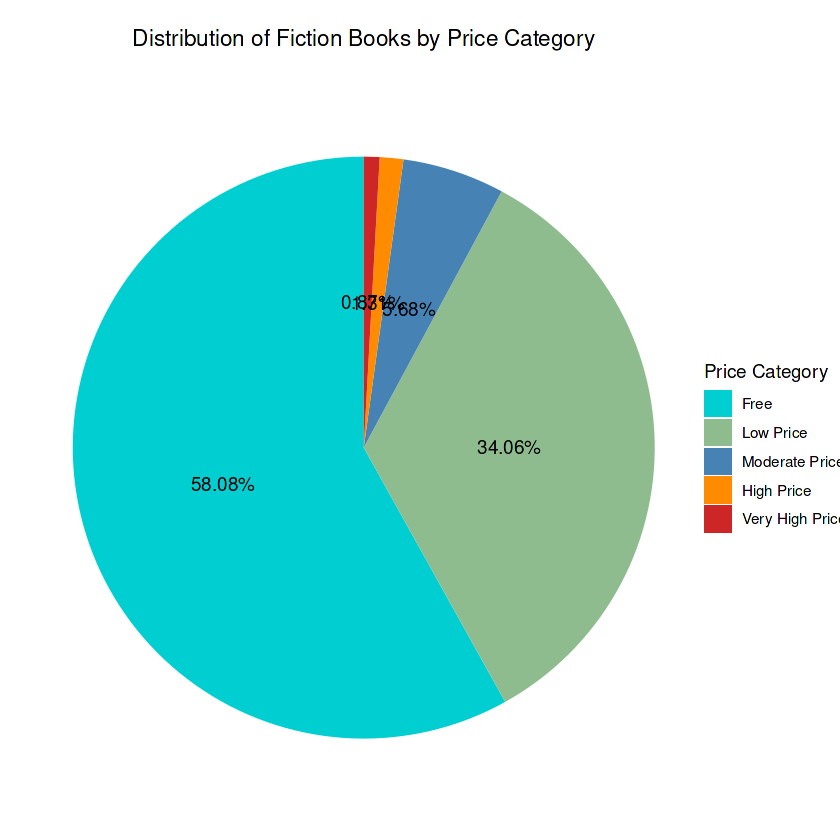

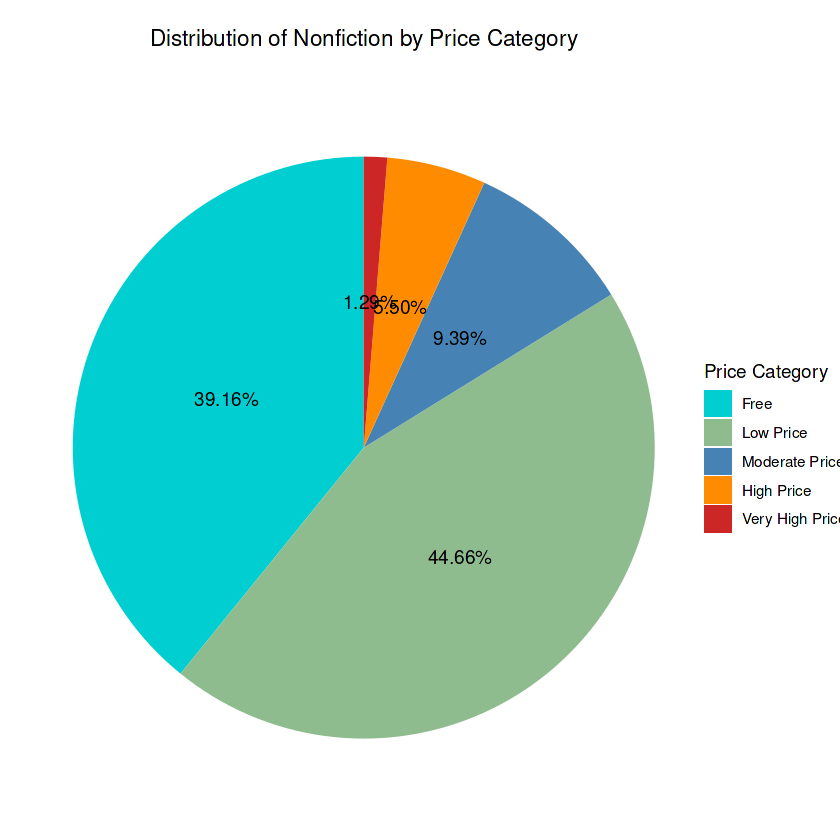

Saving 12.5 x 6.67 in image


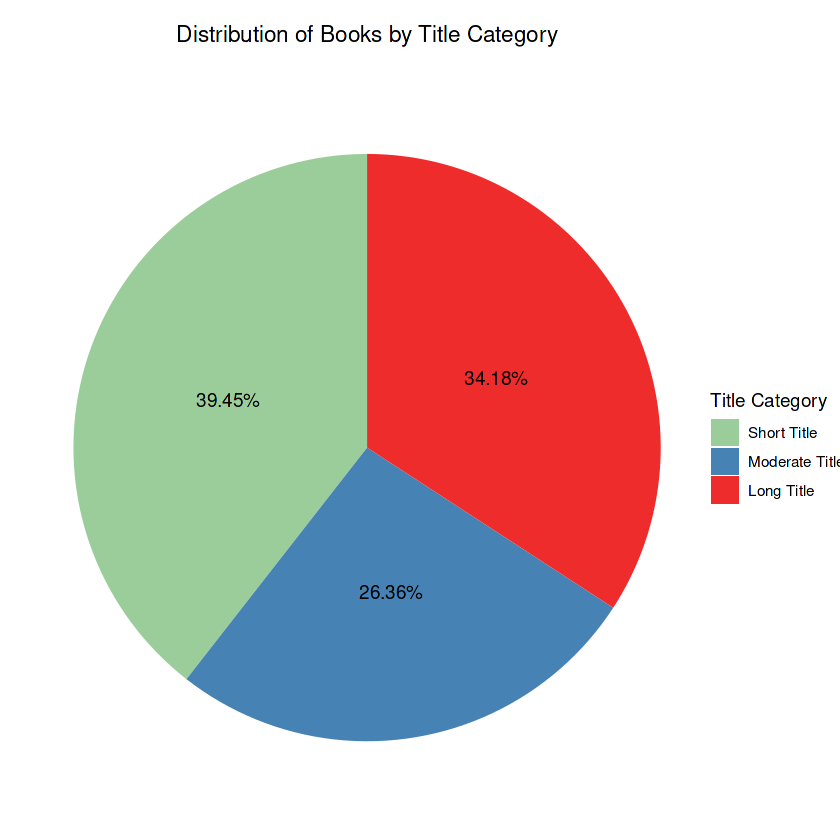

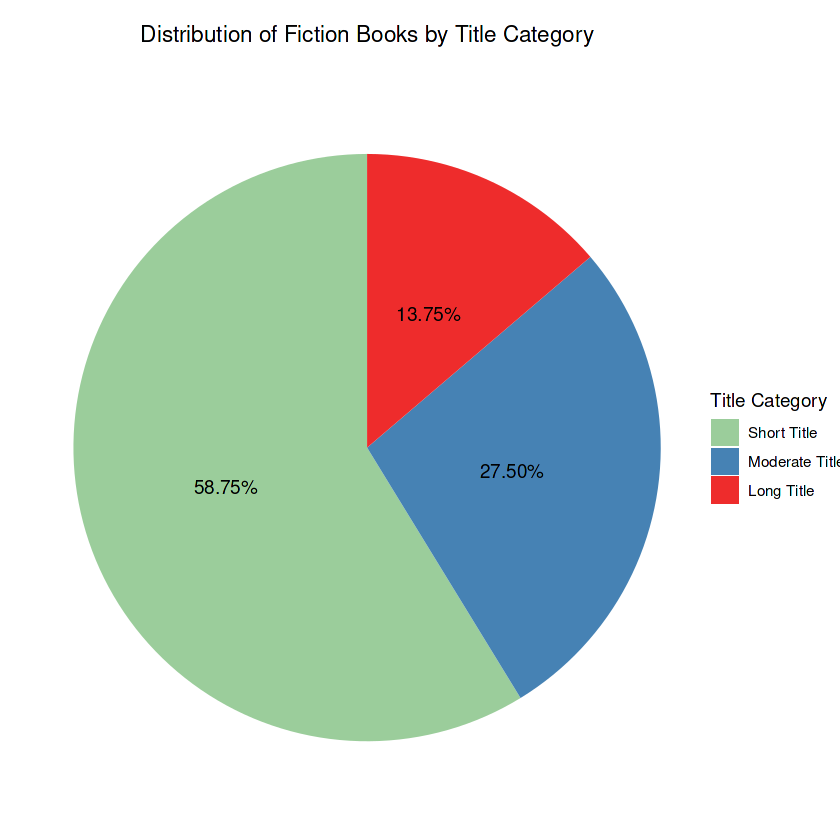

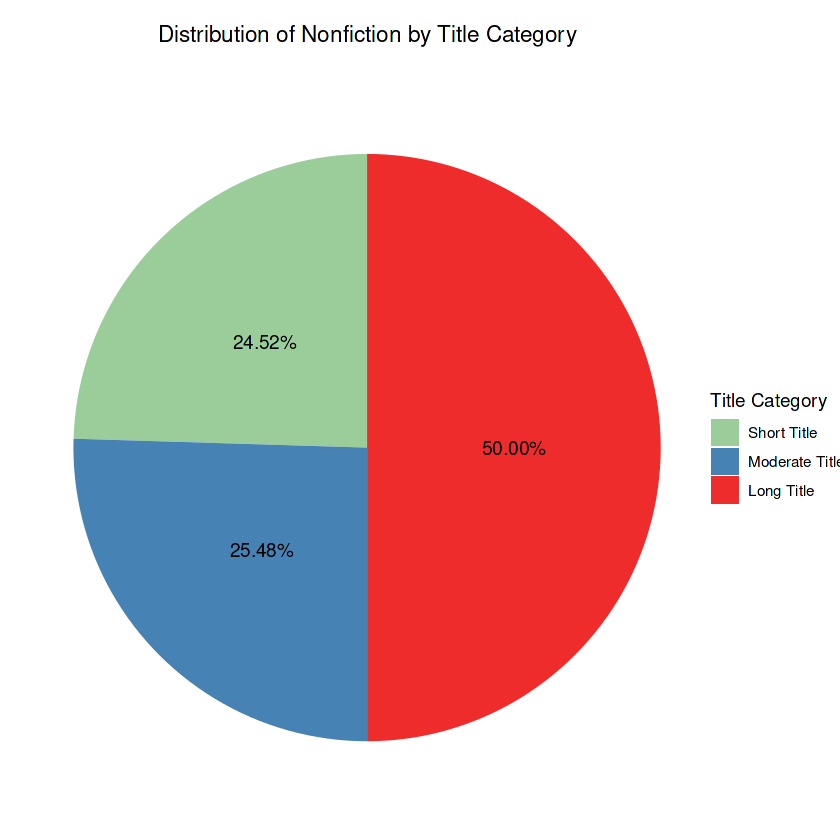

In [20]:
#Category Analysis
#Rating Category
#Pie chart of Distribution of Books by Rating Category 
rating_counts <- bestsellers %>%
  group_by(rating_category) %>%
  summarise(count = n())

ggplot(rating_counts, aes(x = "", y = count, fill = rating_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Books by Rating Category",
       fill = "Rating Cat.") +
  scale_fill_manual(values = c("Outstanding" = "firebrick3", "Excellent" = "steelblue", "Very Good" = "darkseagreen3", "Good" = "gold2")) +
  geom_text(aes(label = paste0(count, " (", scales::percent(count / sum(count), accuracy = 0.01), ")")),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))
ggsave("Distribution of Books by Rating Category.png")

#Distribution of Fiction Books by Rating Category
fiction_rating_counts <- bestsellers %>%
  filter(genre == "Fiction") %>%
  group_by(rating_category) %>%
  summarise(count = n())

ggplot(fiction_rating_counts, aes(x = "", y = count, fill = rating_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Fiction Books by Rating Category",
       fill = "Rating Cat.") +
  scale_fill_manual(values = c("Outstanding" = "firebrick3", "Excellent" = "steelblue", "Very Good" = "darkseagreen3", "Good" = "gold2")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))

#Distribution of Nonfiction Books by Rating Category
nonfiction_rating_counts <- bestsellers %>%
  filter(genre == "Non Fiction") %>%
  group_by(rating_category) %>%
  summarise(count = n())

ggplot(nonfiction_rating_counts, aes(x = "", y = count, fill = rating_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Nonfiction Books by Rating Category",
       fill = "Rating Cat.") +
  scale_fill_manual(values = c("Outstanding" = "firebrick3", "Excellent" = "steelblue", "Very Good" = "darkseagreen3", "Good" = "gold2")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))

#Review Category
#Pie chart of the Distribution of Books by Review Category
review_counts <- bestsellers %>%
  group_by(review_category) %>%
  summarise(count = n())

ggplot(review_counts, aes(x = "", y = count, fill = review_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Books by Review Category",
       fill = "Review Category") +
  scale_fill_manual(values = c("Very High Reviews" = "firebrick3", "High Reviews" = "darkorange", "Moderate Reviews" = "steelblue", "Low Reviews" = "darkseagreen", "Very Low Reviews" = "darkturquoise")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))
ggsave("Distribution of Books by Review Category.png")

#Distribution of Fiction Books by Review Category
fiction_review_counts <- bestsellers %>%
  filter(genre == "Fiction") %>%
  group_by(review_category) %>%
  summarise(count = n())

ggplot(fiction_review_counts, aes(x = "", y = count, fill = review_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Fiction by Review Category",
       fill = "Review Category") +
  scale_fill_manual(values = c("Very High Reviews" = "firebrick3", "High Reviews" = "darkorange", "Moderate Reviews" = "steelblue", "Low Reviews" = "darkseagreen", "Very Low Reviews" = "darkturquoise")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))

#Distribution of Nonfiction Books by Review Category
nonfiction_review_counts <- bestsellers %>%
  filter(genre == "Non Fiction") %>%
  group_by(review_category) %>%
  summarise(count = n())

ggplot(nonfiction_review_counts, aes(x = "", y = count, fill = review_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Nonfiction by Review Category",
       fill = "Review Category") +
  scale_fill_manual(values = c("Very High Reviews" = "firebrick3", "High Reviews" = "darkorange", "Moderate Reviews" = "steelblue", "Low Reviews" = "darkseagreen", "Very Low Reviews" = "darkturquoise")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))

#Price Category
#Pie chart of the Distribution of Books by Price Category
price_counts <- bestsellers %>%
  group_by(price_category) %>%
  summarise(count = n()) %>%
  filter(!is.na(price_category))  # Remove null values

ggplot(price_counts, aes(x = "", y = count, fill = price_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Books by Price Category",
       fill = "Price Category") +
  scale_fill_manual(values = c("Very High Price" = "firebrick3", "High Price" = "darkorange", "Moderate Price" = "steelblue", "Low Price" = "darkseagreen", "Free" = "darkturquoise")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))
ggsave("Distribution of Books by Price Category.png")

#Distribution of Fiction Books by Price Category
fiction_price_counts <- bestsellers %>%
  filter(genre == "Fiction") %>%
  group_by(price_category) %>%
  summarise(count = n()) %>%
  filter(!is.na(price_category))  # Remove null values

ggplot(fiction_price_counts, aes(x = "", y = count, fill = price_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Fiction Books by Price Category",
       fill = "Price Category") +
  scale_fill_manual(values = c("Very High Price" = "firebrick3", "High Price" = "darkorange", "Moderate Price" = "steelblue", "Low Price" = "darkseagreen", "Free" = "darkturquoise")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))

#Distribution of Nonfiction Books by Price Category
nonfiction_price_counts <- bestsellers %>%
  filter(genre == "Non Fiction") %>%
  group_by(price_category) %>%
  summarise(count = n()) %>%
  filter(!is.na(price_category))  # Remove null values

ggplot(nonfiction_price_counts, aes(x = "", y = count, fill = price_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Nonfiction by Price Category",
       fill = "Price Category") +
  scale_fill_manual(values = c("Very High Price" = "firebrick3", "High Price" = "darkorange", "Moderate Price" = "steelblue", "Low Price" = "darkseagreen", "Free" = "darkturquoise")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))
       
#Title Category
#Pie chart of Distribution of Books by Title Category
title_counts <- bestsellers %>%
  group_by(title_category) %>%
  summarise(count = n())

ggplot(title_counts, aes(x = "", y = count, fill = title_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Books by Title Category",
       fill = "Title Category") +
  scale_fill_manual(values = c("Long Title" = "firebrick2", "Moderate Title" = "steelblue", "Short Title" = "darkseagreen3")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))
ggsave("Distribution of Books by Title Category.png")

#Distribution of Fiction Books by Title Category
fiction_title_counts <- bestsellers %>%
  filter(genre == "Fiction") %>%
  group_by(title_category) %>%
  summarise(count = n())

ggplot(fiction_title_counts, aes(x = "", y = count, fill = title_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Fiction Books by Title Category",
       fill = "Title Category") +
  scale_fill_manual(values = c("Long Title" = "firebrick2", "Moderate Title" = "steelblue", "Short Title" = "darkseagreen3")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))

#Distribution of Nonfiction Books by Title Category
nonfiction_title_counts <- bestsellers %>%
  filter(genre == "Non Fiction") %>%
  group_by(title_category) %>%
  summarise(count = n())

ggplot(nonfiction_title_counts, aes(x = "", y = count, fill = title_category)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Nonfiction by Title Category",
       fill = "Title Category") +
  scale_fill_manual(values = c("Long Title" = "firebrick2", "Moderate Title" = "steelblue", "Short Title" = "darkseagreen3")) +
  geom_text(aes(label = scales::percent(count / sum(count), accuracy = 0.01)),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, margin = margin(b = 20)),
        legend.position = "right",
        legend.margin = margin(0, 0, 0, -20))

- As expected, most bestsellers (82.18%) have an outstanding rating category, while there is a 16.55% in the excellent category. There are 6 bestsellers that performed very well and only 1 bestseller with a just good performance.
- We can see that there are less excellent bestsellers for fiction books but more of the other categories including outstanding books. On the other hand, nonfiction bestsellers performed much better as they only have outstanding and excellent ratings.
- Most bestsellers (34.91%) have a low number of reviews, followed by a moderate number of reviews (27.64%), while a high and very high number of reviews represents 26.72% of bestsellers.
- Fiction bestsellers have a higher percentage of high and very high reviews, constituting 37.92% of all fiction books, while nonfiction books have  a lower percentage where they have a lot of reviews, constituting 18.07% of all nonfiction books. Since  nonfiction books recieve more positive ratings, this can be a first indicator that the reviews might be mostly written for more negative experiences.
- Most bestsellers (47.21%) are free, while 40.15% had a low price and only 4.58% had higher prices. This is an indicator that bestsellers don't need to be expensive but cheaper and even free to become popular and actually reach the the top Amazon Bestsellers, since readers prefer free or cheap books.
- Fiction bestsellers are mostly (58.08%) free, and only 2.18% are more expensive. This indicates that for fiction books to be successful, they probably need to be accessible to everyone or to most people, since these are entertaining books that users might be more prompt to read if they're cheap or free.
- On the other hand, nonfiction bestsellers are mostly (44.66%) cheap, with a higher percentage (6.79%) of expensive books and lower percentage (39.16%) of free books. This indicates that since nonfiction books are more technical and topic centered, their price is less important because readers want to read them anyway because of the topic and high-value learning they often transmit.
- Most bestsellers (39.45%) had short titles, meaning that users are more prompted to read a book with a brief title. This means that concise and brief titles attract mthe attention of reader better since they are succinct, clear and straight to the point.
- The great majority of fiction books (58.75%) had short titles and only 13.75% of fiction books had long titles. On the other hand, half of the nonfiction books had long titles, while 24.52% had short titles. 
- This reinforces our idea that fiction books, which are for entertaining, do better when they have short titles to attract more readersOn the other hand, nonfiction books, which are technical and informative books, perform better when their title reflect their topic better, so it's often longer for more precision describing what the book is about.

### Relationships
Now we want to graph scatter plots to see if we can find important relationships for user ratings, number of reviews, price and title length of the Amazon bestsellers throughout this period of 11 years.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 12.5 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


Correlation Coefficient: -0.001729014

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


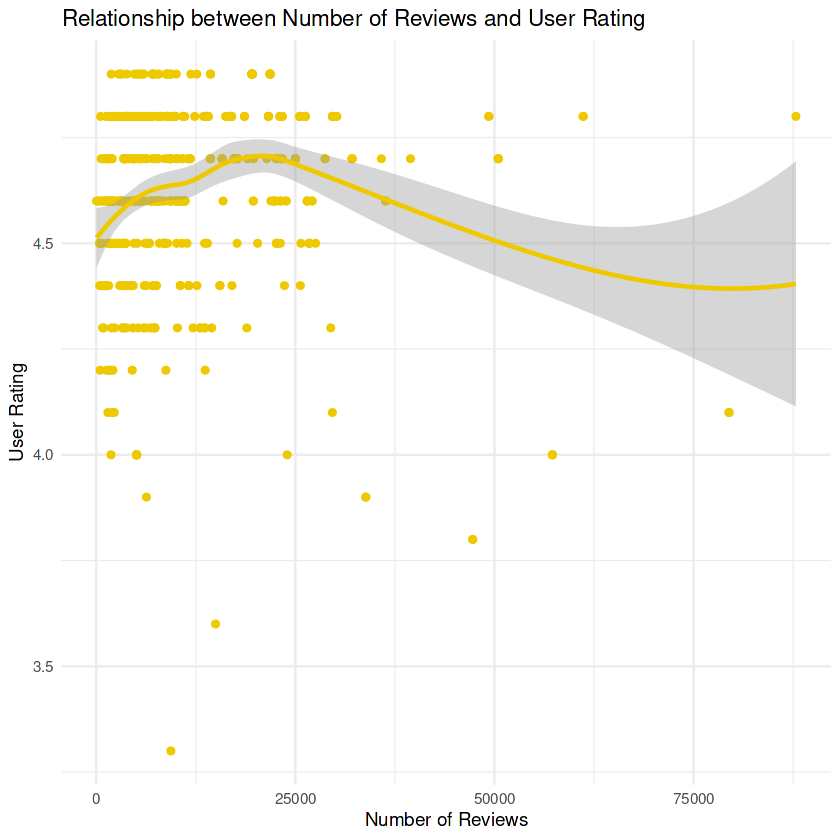

Saving 12.5 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


Correlation Coefficient: -0.1330863

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


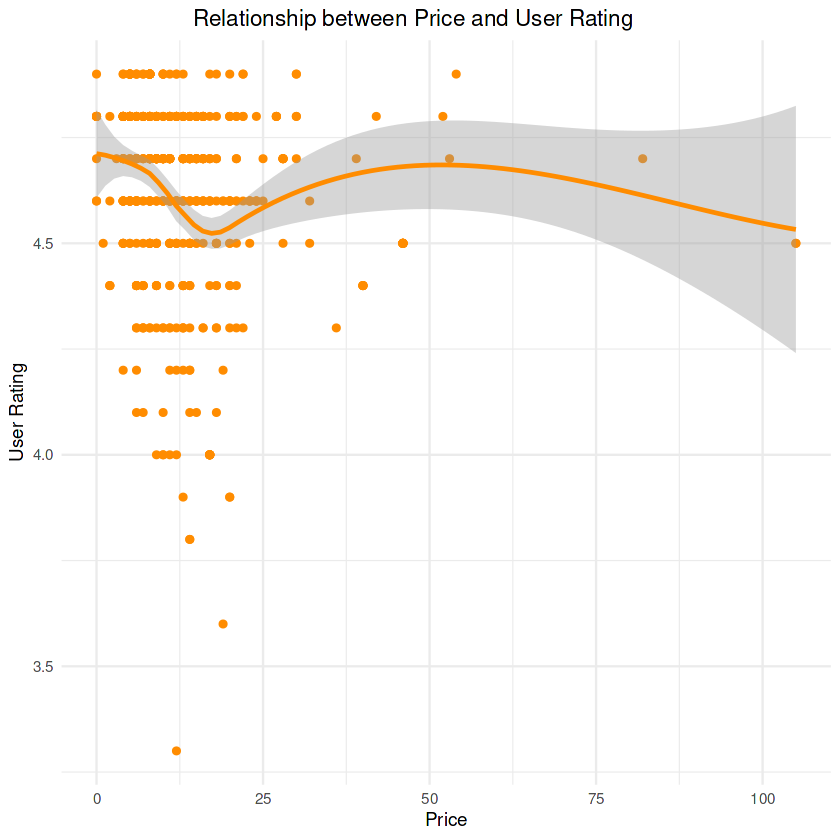

Saving 12.5 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


Correlation Coefficient: -0.1091819

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


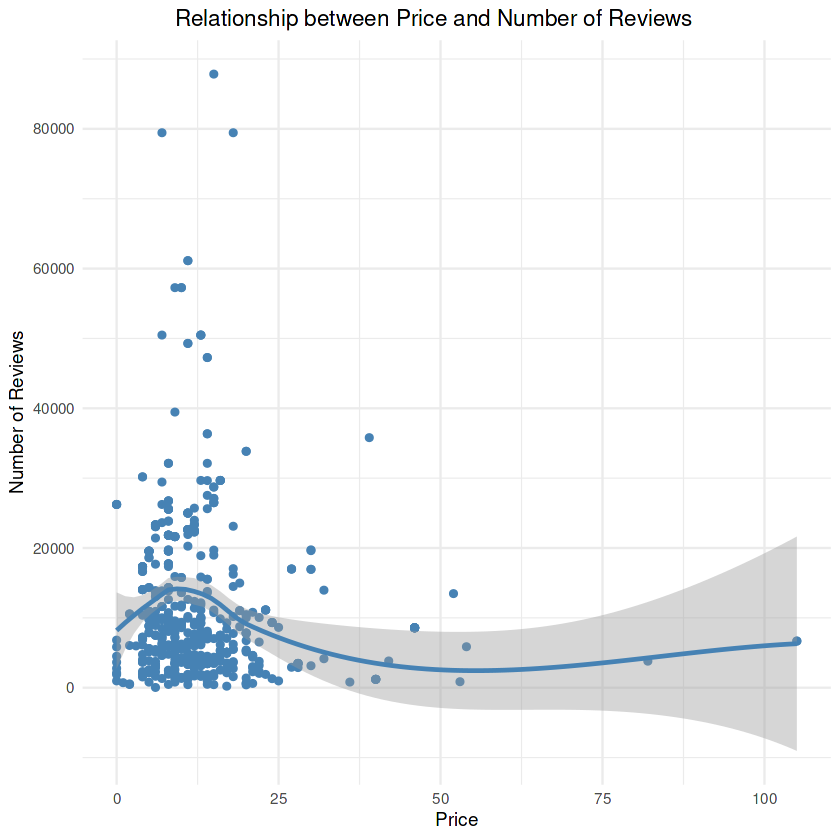

Saving 12.5 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


Correlation Coefficient: 0.00287611

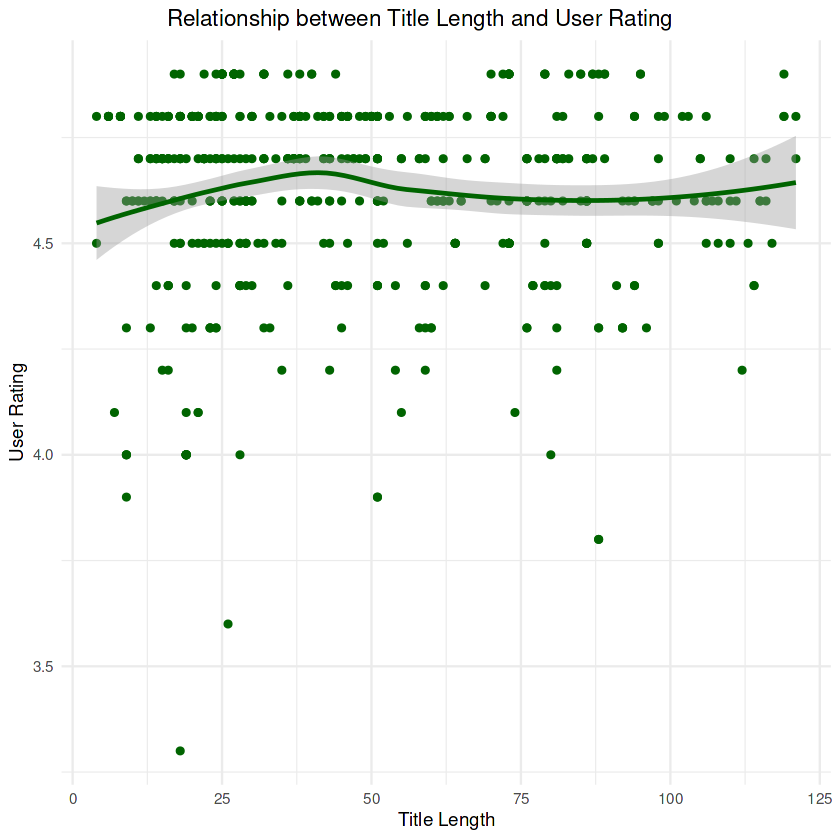

In [21]:
#Relationships
#User Rating vs. Number of Reviews
ggplot(bestsellers, aes(x = reviews, y = user_rating)) +
  geom_point(color = "gold2") +
  geom_smooth(color = "gold2") +
  labs(title = "Relationship between Number of Reviews and User Rating",
       x = "Number of Reviews",
       y = "User Rating") +
  theme_minimal()
ggsave("User Rating vs. Number of Reviews.png")

correlation_coefficient <- cor(bestsellers$reviews, bestsellers$user_rating)
cat("Correlation Coefficient:", correlation_coefficient)

#User Rating vs. Price
ggplot(bestsellers, aes(x = price, y = user_rating)) +
  geom_point(color = "darkorange") +
  geom_smooth(color = "darkorange") +
  labs(title = "Relationship between Price and User Rating",
       x = "Price",
       y = "User Rating") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4))
ggsave("User Rating vs. Price.png")

correlation_coefficient <- cor(bestsellers$price, bestsellers$user_rating)
cat("Correlation Coefficient:", correlation_coefficient)

#Number of Reviews vs. Price
ggplot(bestsellers, aes(x = price, y = reviews)) +
  geom_point(color = "steelblue") +
  geom_smooth(color = "steelblue") +
  labs(title = "Relationship between Price and Number of Reviews",
       x = "Price",
       y = "Number of Reviews") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4))
ggsave("Number of Reviews vs. Price.png")

correlation_coefficient <- cor(bestsellers$price, bestsellers$reviews)
cat("Correlation Coefficient:", correlation_coefficient)

#User Rating vs. Title Length
ggplot(bestsellers, aes(x = title_length, y = user_rating)) +
  geom_point(color = "darkgreen") +
  geom_smooth(color = "darkgreen") +
  labs(title = "Relationship between Title Length and User Rating",
       x = "Title Length",
       y = "User Rating") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.4))
ggsave("User Rating vs. Title Length.png")

correlation_coefficient <- cor(bestsellers$title_length, bestsellers$user_rating)
cat("Correlation Coefficient:", correlation_coefficient)

- There's a very slight negative correlation between the number of reviews and the user rating, as the correlation coefficient of -0.0017 tells us. This indicates that the reviews can be both positive and negative, and there isn't a clear pattern indicating that most reviews are mainly negative. Instead, there is only a slightly higher number of negative reviews.
- There's a weak negative correlation between the price of the book and the user rating of the book, as the correlation coefficient of -0.133 tell us. This indicates that, as the price of a book increases, the user rating tends to slightly decrease, and vice versa. This suggests that for bestsellers, the price of the book somewhat matters to get positive ratings, but not to a great extent.
- There's a weak negative correlation between the price of the book and the number of reviews a book gets, as the correlation coefficient of -0.109 tells us. This indicates that there is a slight tendency that as the price increases, the number of reviews tends to slightly decrease. This can be easily attributed to the fact that many less people have access to expensive books, and thus, they're not able to provide reviews since they haven't read them.
- There's a very weak positive correlation between the title length of the books and the user rating, as the correlation coefficient of 0.0028 tells us. This indicates that as the title length increases, the user rating tends to also increase very slightly, but the relationship is extremely weak. This was expected, as the title length does not influence the quality of the book, but only helps attract readers to prompt them to read it in the first place.

## Summary of the Analysis
The data was formatted with years yyyy in ascending order, the categories for rating, reviews, price and title were sorted accordingly. The data was organized by year, user rating, price and genre. 

Insights and trends that were discovered from the analysis:

-	The increasing number of reviews over time, coupled with a slight increase in ratings, reflects heightened reader engagement with bestsellers.
-	As internet availability expanded since 2012, more readers have been able to provide their reviews, contributing to the upward trend in reviews.
-	The observed trend of decreasing book prices over time points to a strategic shift by authors and publishers because of the increased competition in this digital era.
-	Authors are favoring longer titles to encapsulate the essence of the book and attract attention in this information era.
-	The observed trend of decreasing prices potentially aligns with reader preferences for affordable options.
-	Earlier years saw a concentration of successful authors who managed to produce multiple bestsellers within the same year, but in recent years this has been more challenging.
-	The distribution of authors with varying numbers of bestsellers highlights the complexity of achieving multiple successes.
-	The trend of authors with recurring bestsellers predominantly benefiting from book series emphasizes the complexity of achieving repeated success.
-	An author's reputation, built over time, can significantly influence their number of bestsellers.
-	Amazon readers’ prefer nonfiction, which are books that mirror real-life experiences and knowledge.
-	Fiction books display higher ratings and increased reviews, which suggests that this genre is able to engage readers more on emotional and imaginative levels.
-	Readers prefer cheaper fiction books, while the price of nonfiction books isn’t that important for popularity.
-	Fiction bestsellers perform better with shorter and simpler titles to attract readers.
-	Fiction books, having fewer distinct authors, point to a trend of sequels and series by specific authors, while non-fiction books feature more authors.
-	The decreasing prices in recent years highlight a shift from high pricing to high-volume sales and accessibility.
-	Fiction bestsellers encompass a broader range of ratings, suggesting a mix of personal preferences and subjective experiences.
-	The majority of bestsellers thrive with moderate numbers of reviews.
-	Generally, Amazon readers prefer affordable books, but this is more relevant for fiction offerings so that a broader audience is attracted to read them.
-	Readers are more attracted to more concise and brief titles in general.
-	The weak negative correlation between price and review count reflects the access barrier of higher-priced books.

These insights help to answer the business question by providing ways in which both types of genres, along with relevant factors, perform on Amazon and how they have the potential to become bestsellers, because it helps us decipher how factors such as genre, pricing, title length, and user ratings impact a book's performance.\
This way, my team will generate insights into the preferences and behaviors of Amazon readers when it comes to fiction and nonfiction books. This data-driven approach will enable the team to develop a comprehensive understanding of the key drivers that contribute to a book's success on the platform.

### Presentation and Dashboard

Optink Data Analytics Case Study Tableau Dashboard:\
https://public.tableau.com/views/DataAnalyticsCaseStudy-Optink/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

Optink's Book Sucess Strategies Presentation:\
https://docs.google.com/presentation/d/e/2PACX-1vTBG4mGsAJrmPYYuvivdDCFb1GtDzaz8WwHlcduVLXhGaYPd-XmwDg9V_WBXRJSAA/pub?start=false&loop=false&delayms=3000

Jaime A. Velasquez's Portfolio - GitHub Repository:\
https://github.com/jaimeandrevelasquez/jaimeandrevelasquez.github.io

# *Act Phase*

### **Conclusions**

- Lower prices led to increased accessibility and wider reader engagement, contributing to higher popularity.
- The digital era has redefined pricing, accessibility, and reader-author interactions.
- Achieving multiple successes has become more challenging over time.
- Authors have adapted strategies to thrive in a competitive landscape.
- While readers favor non-fiction for exploration, they engage with fiction more intensely.
- The alignment of lower prices with higher engagement underlines the strategic interplay between price and popularity.
- Short titles perform better for fiction books and longer titles for nonfiction books.
- Fiction bestsellers are more likely to include series and sequels than nonfiction bestsellers.
- In recent years, lower prices to increase accessibility and sales are key to a success of a book.
- Nonfiction bestsellers have higher ratings because they are more valuable at transmitting knowledge.
- Fiction books engage their readers more so that they have a propensity to share their opinions.
- Fiction books need to be cheaper or free to attract a broader audience.
- Nonfiction books need to be more valuable in quality, offering more specialized knowledge to be successful.
- Fiction books attract more readers if their titles are short and concise.
- Reviews are both positive and negative, with just slightly more negative reviews.
- Price has a weak influence on ratings.
- Non-fiction's higher ratings and lower review counts means that its audience seeks specialized content and are willing to engage deeply.
- The prevalence of free fiction bestsellers and affordable non-fiction bestsellers indicates a strategic alignment with reader preferences.
- Fiction books have shorter titles to attract more readers, while nonfiction books have longer titles to clarify the topic.
- The varied pricing aligns with readers' perceived value of content—learning for non-fiction and entertainment for fiction.
- While title length has a minimal impact on ratings, it reflects the unique strategies each genre employs to capture readers' attention.

### **Recommendations**

1. **Adopt flexible pricing strategies based on genre:** 
   Optink should implement dynamic pricing strategies, focusing on affordability and accessibility based on the genre of the books. Fiction books need to have lower prices than nonfiction books, while the latter should be based on the quality and value of the content. Since free books attract even broader audiences, it’s important to offer periodic free fiction books based on promotions and discounts.

2. **Targeted marketing campaign for two segments:**
   Optink should target its marketing campaign for two segments. The first segment comprises fiction authors, for which Optink should emphasize the potential for series and sequels, and showcase the emotional impact and entertainment value of storytelling creating tailored marketing strategies that can elevate a fiction book's engagement and popularity. The second segment comprises nonfiction authors, for which Optink should highlight their expertise and potential to impact readers' lives with their specialized knowledge to position them as thought leaders in their field.
   
3. **Embrace digital era dynamics:**
   Optink should recognize the changing dynamics of the digital era, where pricing, accessibility, and reader interactions have been redefined. Optink should invest in many platforms besides Amazon, in digital marketing, social media engagement, and online reader communities to foster a deeper connection between authors, readers, and their works.

4. **Leverage reviews for growth:**
   Since reviews include positive and negative opinions, Optink should encourage authors and publishers to utilize reader reviews as a valuable source of feedback and insights, addressing negative feedback constructively to learn from it.
   
5. **Tailored titles:**
   Optink should recommend that fiction authors opt for short and concise titles that capture readers' attention quickly and nonfiction authors that use longer titles that clearly convey the subject matter and knowledge.
   
6. **Collaboration and partnerships with publishers and experts:**
   Optink should partner with relevant publishers and experts in the industry to collaborate and engage authors through online events, workshops and webinars focused on building the nonfiction author's personal brand and knowledge in their field and the fiction author’s storytelling technique. Optink should create joint promotions, endorsements and virtual book tours that lend credibility to authors.
   
7. **Encourage quality content:**
   Optink should encourage nonfiction authors to focus on providing high-quality specialized content and knowledge that meets readers' needs to provide value that makes the books worth reading. Fiction authors should engage readers through captivating storylines and characters that evoke emotions.
   
### Further Exploration:

- Analyze performance not only for bestsellers, but also for books that had less success on Amazon.
- Analyze book performance on other well-known platforms for publishing books.
- Collect and analyze book performance of Optink’s clients on different platforms.
- Collect data about the authors who have engaged with Optink's services. Collect and analyze demographic data along with professional background and writing experience.
- Conduct a long-term analysis of Optink’s customers who followed their strategies to measure the long-term impact on their book sales, ratings, and visibility.
